# Predicción de empresas de alto crecimiento

## 1. Preparación 

Se importan las librerias necesarias

In [1140]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import TomekLinks
from matplotlib import pyplot
from numpy import where
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.svm import SVC as svc 
from sklearn.metrics import plot_roc_curve
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.model_selection import train_test_split


In [ ]:
import warnings
warnings.filterwarnings('ignore')

## 2. Carga de datos

Lectura de todos los datasets de entrada, entre los que se encuentras los datos financieros del 2017 al 2020, el numero de contratos con el estado pra estos tres años asi como los datos de las empresas, causas judiciales, modificaciones de estatutos.

In [1141]:
df_2017 = pd.read_excel(r'C:\Users\gabol\Downloads\Compressed\Datasets TFM-20211110T015007Z-001\Datasets TFM\Bal2017.xlsx')
df_2018 = pd.read_excel(r'C:\Users\gabol\Downloads\Compressed\Datasets TFM-20211110T015007Z-001\Datasets TFM\Bal2018.xlsx')
df_2019 = pd.read_excel(r'C:\Users\gabol\Downloads\Compressed\Datasets TFM-20211110T015007Z-001\Datasets TFM\Bal2019.xlsx')
df_2020 = pd.read_excel(r'C:\Users\gabol\Downloads\Compressed\Datasets TFM-20211110T015007Z-001\Datasets TFM\Bal2020.xlsx')
df_contratos = pd.read_excel(r'C:\Users\gabol\Downloads\Compressed\Datasets TFM-20211110T015007Z-001\Datasets TFM\ContratosEstado.xlsx')
df_datos_empresa=pd.read_excel(r'C:\Users\gabol\Downloads\Compressed\Datasets TFM-20211110T015007Z-001\Datasets TFM\Datos-Empresa.xlsx')
df_rama_judicial= pd.read_excel(r'C:\Users\gabol\Downloads\Compressed\Datasets TFM-20211110T015007Z-001\Datasets TFM\RamaJudicial.xlsx')
df_modificacion_statutos=pd.read_excel(r'C:\Users\gabol\Downloads\Compressed\Datasets TFM-20211110T015007Z-001\Datasets TFM\ModificacionEstatutos.xlsx')
df_partidas = pd.read_excel(r'C:\Users\gabol\Downloads\Compressed\Datasets TFM-20211110T015007Z-001\Datasets TFM\Partidas.xlsx')

Nombres de campos para dataset con informacion financiera anual

In [1142]:
df_2017_names = df_2017.rename(columns=dict(df_partidas.values))
df_partidas

,PARTIDA,DESCRIPCION
0,AC,ACTIVO
1,ACC,TOTAL ACTIVO CORRIENTE
2,ACC113,CUENTAS POR COBRAR - DEUDORES
3,ACC114,INVENTARIOS
4,ACC118,OTROS ACTIVOS
5,ACC11H,ACTIVOS POR IMPUESTOS CORRIENTES
6,ACC211,EFECTIVO Y EQUI.
7,ACL,ACTIVOS NO CORRIENTES
8,ACL115,PROPIEDADES PLANTA Y EQUIPO
9,ACL118,OTROS ACTIVOS


Se puede ver que todos los campos del conjunto de datos son numericos

## 3. Datos faltantes

In [ ]:
Los porcentajes de valores faltantes estan la lista a continuacion, estos se utlizaran para poder definir una estrategia para reducirlos.

In [1143]:
percent_missing = df_2017.isnull().sum() * 100 / len(df_2017)
missing_value_df = pd.DataFrame({'column_name': df_2017.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True,ascending=False)
missing_value_df

,column_name,percent_missing
RAGE52,RAGE52,98.281619
ACL11M,ACL11M,75.136412
ACL11Q,ACL11Q,67.578793
ACL118,ACL118,59.280072
PTT132,PTT132,57.105627
ACL11R,ACL11R,54.564704
PSL12J,PSL12J,50.761463
PSL228,PSL228,48.065803
ACC118,ACC118,46.762766
RAIXFI,RAIXFI,46.371854


Para los valores nulos, se eliminan todos los atributos que tengan mas de 50% de valores nulos, esto debido a no se contara con informacion confiable si la mayoria de datos son creados artificalmente. Para los demas campos que tienen valores nulos se procede con imputarlos usando regresion lineal tomando como conjunto de entrenamiento a los registros que si tienen valores.

In [1147]:
#eLIMINAR CAMPOS CON MAS DE 50% DE NULOS
df_2017 = df_2017.drop('RAGE52', 1)
df_2017 = df_2017.drop('ACL11M', 1)
df_2017 = df_2017.drop('ACL11Q', 1)
df_2017 = df_2017.drop('ACL118', 1)
df_2017 = df_2017.drop('PTT132', 1)
df_2017 = df_2017.drop('ACL11R', 1)
df_2017 = df_2017.drop('PSL12J', 1)

df_2018 = df_2018.drop('RAGE52', 1)
df_2018 = df_2018.drop('ACL11M', 1)
df_2018 = df_2018.drop('ACL11Q', 1)
df_2018 = df_2018.drop('ACL118', 1)
df_2018 = df_2018.drop('PTT132', 1)
df_2018 = df_2018.drop('ACL11R', 1)
df_2018 = df_2018.drop('PSL12J', 1)

df_2019 = df_2019.drop('RAGE52', 1)
df_2019 = df_2019.drop('ACL11M', 1)
df_2019 = df_2019.drop('ACL11Q', 1)
df_2019 = df_2019.drop('ACL118', 1)
df_2019 = df_2019.drop('PTT132', 1)
df_2019 = df_2019.drop('ACL11R', 1)
df_2019 = df_2019.drop('PSL12J', 1)

df_2020 = df_2020.drop('RAGE52', 1)
df_2020 = df_2020.drop('ACL11M', 1)
df_2020 = df_2020.drop('ACL11Q', 1)
df_2020 = df_2020.drop('ACL118', 1)
df_2020 = df_2020.drop('PTT132', 1)
df_2020 = df_2020.drop('ACL11R', 1)
df_2020 = df_2020.drop('PSL12J', 1)


In [ ]:
Para imputar los datos con una regresion lineal se crea un metodo que toma cada columna con valores y nulos y crea un conjunto de datos de entrenamiento y de prediccion. Y aplica regresion lineal para predecir los calores nulos de cada columna.

In [1145]:
def impute_linreg(df_2017,missincol):
    ids= df_2017['ID']
    df_2017 = df_2017.drop('ID', 1)
    nan_values = df_2017.notnull()
    nan_columns = nan_values.all()
    columns_with_nan = df_2017.columns[nan_columns].tolist()
    columns_with_nan.append(missincol)

    lr = LinearRegression()
    testdf = df_2017[df_2017[missincol].isnull()==True]
    traindf = df_2017[df_2017[missincol].isnull()==False]
    

    testdf=testdf[columns_with_nan]

    y = traindf[missincol]
    traindf=traindf[columns_with_nan]
    traindf.drop(missincol,axis=1,inplace=True)
    lr.fit(traindf,y)
    testdf.drop(missincol,axis=1,inplace=True)
    pred = lr.predict(testdf)
    testdf[missincol]= pred
    df_2017[missincol+'_miss'] =testdf[missincol]
    df_2017[missincol] = np.where(df_2017[missincol].isnull(), df_2017[missincol+'_miss'], df_2017[missincol])
    df_2017.drop(missincol+"_miss",axis=1,inplace=True)
    df_2017['ID']=ids
    return df_2017

In [ ]:
Se obtiene una lista de columnas con valores nulos

In [1148]:
nan_values = df_2017.isnull()
nan_columns = nan_values.any()
columns_with_nan = df_2017.columns[nan_columns].tolist()

In [ ]:
Para cada columna se calculan los valores nulos mediante regresion lineal.

In [1149]:
for col in columns_with_nan:
    df_2017=impute_linreg(df_2017,col)

In [ ]:
Se realiza de la misma manera para los datasets de los siguientes años.

In [1150]:
nan_values = df_2018.isnull()
nan_columns = nan_values.any()
columns_with_nan = df_2018.columns[nan_columns].tolist()

In [1151]:
for col in columns_with_nan:
    df_2018=impute_linreg(df_2018,col)

In [1152]:
nan_values = df_2019.isnull()
nan_columns = nan_values.any()
columns_with_nan = df_2019.columns[nan_columns].tolist()

In [1153]:
for col in columns_with_nan:
    df_2019=impute_linreg(df_2019,col)

## 4. Seleccion de caracteristicas

Otra consecuencia de tener varios campos agegados financieros es la alta correlacion entre estos, se muestran los que tienen correlacion de mas del 70% y se eliminan uno de los pares, tomando en cuenta el campo que mayor numero de nulos tenga y que contenga mas campos agregados. Se eliminan tambien los datos relacionados a los ingresos puesto que esta forma parte de los datos para calcular la variable target.

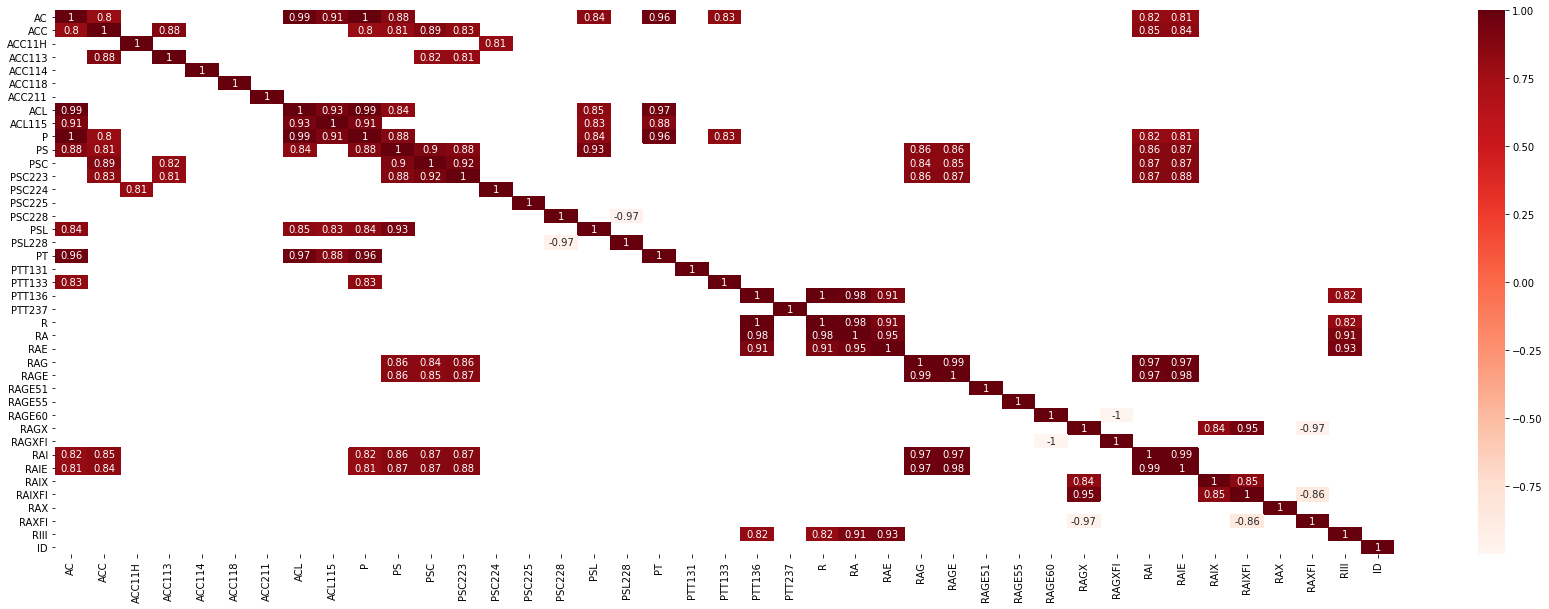

In [1154]:
dfCorr = df_2017.corr()
filteredDf = dfCorr[((dfCorr >= .7) | (dfCorr <= -.7)) ]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

In [1155]:
#eMILINAR CAMPOS CON ALTA CORRELACION ENTRE ELLOS
df_2017 = df_2017.drop('ACL115', 1)
df_2017 = df_2017.drop('ACL', 1)
df_2017 = df_2017.drop('PSL', 1)
df_2017 = df_2017.drop('PSC', 1)
df_2017 = df_2017.drop('P', 1)
df_2017 = df_2017.drop('RAGE', 1)
df_2017 = df_2017.drop('RAGE60', 1)
df_2017 = df_2017.drop('RAGX', 1)
df_2017 = df_2017.drop('RAGXFI', 1)
df_2017 = df_2017.drop('PT', 1)
df_2017 = df_2017.drop('PTT133', 1)
df_2017 = df_2017.drop('PS', 1)
df_2017 = df_2017.drop('ACC', 1)
df_2017 = df_2017.drop('PSC223', 1)

#cAMPOS RELACIONADOS A LA VARIABLE TARGET
df_2017 = df_2017.drop('RAE', 1)
df_2017 = df_2017.drop('RAI', 1)
df_2017 = df_2017.drop('RA', 1)
df_2017 = df_2017.drop('R', 1)
df_2017 = df_2017.drop('RIII', 1)

#eMILINAR CAMPOS CON ALTA CORRELACION ENTRE ELLOS
df_2019 = df_2019.drop('ACL115', 1)
df_2019 = df_2019.drop('ACL', 1)
df_2019 = df_2019.drop('PSL', 1)
df_2019 = df_2019.drop('PSC', 1)
df_2019 = df_2019.drop('P', 1)
df_2019 = df_2019.drop('RAGE', 1)
df_2019 = df_2019.drop('RAGE60', 1)
df_2019 = df_2019.drop('RAGX', 1)
df_2019 = df_2019.drop('RAGXFI', 1)
df_2019 = df_2019.drop('PT', 1)
df_2019 = df_2019.drop('PTT133', 1)
df_2019 = df_2019.drop('PS', 1)
df_2019 = df_2019.drop('ACC', 1)
df_2019 = df_2019.drop('PSC223', 1)

#cAMPOS RELACIONADOS A LA VARIABLE TARGET
df_2019 = df_2019.drop('RAE', 1)
df_2019 = df_2019.drop('RAI', 1)
df_2019 = df_2019.drop('RA', 1)
df_2019 = df_2019.drop('R', 1)
df_2019 = df_2019.drop('RIII', 1)

#eMILINAR CAMPOS CON ALTA CORRELACION ENTRE ELLOS
df_2020 = df_2020.drop('ACL115', 1)
df_2020 = df_2020.drop('ACL', 1)
df_2020 = df_2020.drop('PSL', 1)
df_2020 = df_2020.drop('PSC', 1)
df_2020 = df_2020.drop('P', 1)
df_2020 = df_2020.drop('RAGE', 1)
df_2020 = df_2020.drop('RAGE60', 1)
df_2020 = df_2020.drop('RAGX', 1)
df_2020 = df_2020.drop('RAGXFI', 1)
df_2020 = df_2020.drop('PT', 1)
df_2020 = df_2020.drop('PTT133', 1)
df_2020 = df_2020.drop('PS', 1)
df_2020 = df_2020.drop('ACC', 1)
df_2020 = df_2020.drop('PSC223', 1)

#cAMPOS RELACIONADOS A LA VARIABLE TARGET
df_2020 = df_2020.drop('RAE', 1)
df_2020 = df_2020.drop('RAI', 1)
df_2020 = df_2020.drop('RA', 1)
df_2020 = df_2020.drop('R', 1)
df_2020 = df_2020.drop('RIII', 1)

#eMILINAR CAMPOS CON ALTA CORRELACION ENTRE ELLOS
df_2018 = df_2018.drop('ACL115', 1)
df_2018 = df_2018.drop('ACL', 1)
df_2018 = df_2018.drop('PSL', 1)
df_2018 = df_2018.drop('PSC', 1)
df_2018 = df_2018.drop('P', 1)
df_2018 = df_2018.drop('RAGE', 1)
df_2018 = df_2018.drop('RAGE60', 1)
df_2018 = df_2018.drop('RAGX', 1)
df_2018 = df_2018.drop('RAGXFI', 1)
df_2018 = df_2018.drop('PT', 1)
df_2018 = df_2018.drop('PTT133', 1)
df_2018 = df_2018.drop('PS', 1)
df_2018 = df_2018.drop('ACC', 1)
df_2018 = df_2018.drop('PSC223', 1)

#cAMPOS RELACIONADOS A LA VARIABLE TARGET
df_2018 = df_2018.drop('RAE', 1)
df_2018 = df_2018.drop('RAI', 1)
df_2018 = df_2018.drop('RA', 1)
df_2018 = df_2018.drop('R', 1)
df_2018 = df_2018.drop('RIII', 1)


Como resultado de este proceso se tiene un dataset mas limpio que no conteniene informacion redundante.

Text(0.5, 1.0, 'Variable Correlation')

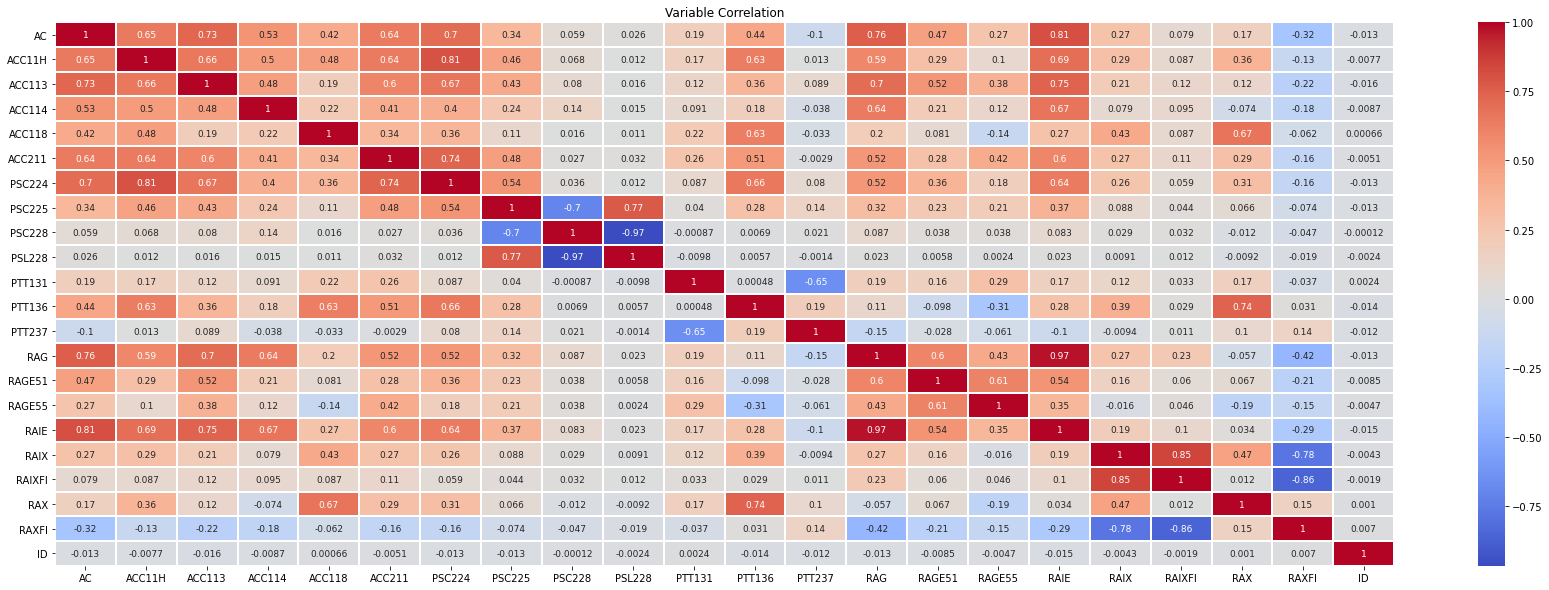

In [1157]:
plt.figure(figsize=(30,10))
sns.heatmap(df_2017.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')

## 5. Integración de datos

### 5.1 Datos financieros

Se agregan sufijos a cada dataset para identificar a los campos de cada año

In [1159]:
df_2017.columns = df_2017.columns.map(lambda x: str(x) + '_2017')
df_2018.columns = df_2018.columns.map(lambda x: str(x) + '_2018')
df_2019.columns = df_2019.columns.map(lambda x: str(x) + '_2019')
df_2020.columns = df_2020.columns.map(lambda x: str(x) + '_2020')

Se eliminan registros duplicados

In [1160]:
df_2017=df_2017.drop_duplicates(subset=['ID_2017'])
df_2018=df_2018.drop_duplicates(subset=['ID_2018'])
df_2019=df_2019.drop_duplicates(subset=['ID_2019'])
df_2020=df_2020.drop_duplicates(subset=['ID_2020'])

Se realiza un merge de los 4 datasets con datos financieros.

In [1161]:
df_total=df_2017.merge(df_2018,left_on='ID_2017',right_on='ID_2018')
df_total=df_total.merge(df_2019,left_on='ID_2017',right_on='ID_2019')
df_total=df_total.merge(df_2020,left_on='ID_2017',right_on='ID_2020')

### 5.3 Construcción variable target

Se extraen solo los atributos correspondientes a los ingresos totales

In [1162]:
df_ingresos=df_total[['ID_2017','RAIE_2017','RAIE_2018','RAIE_2019','RAIE_2020']]

Se calcula el porcentaje de crecimiento de ingresos interanual para el 2018, 2019, 2020.

In [1163]:
df_ingresos['inter_2018'] = df_ingresos.apply(lambda row : (row['RAIE_2018']-row['RAIE_2017'])/row['RAIE_2017'], axis = 1)
df_ingresos['inter_2019'] = df_ingresos.apply(lambda row : (row['RAIE_2019']-row['RAIE_2018'])/row['RAIE_2018'], axis = 1)
df_ingresos['inter_2020'] = df_ingresos.apply(lambda row : (row['RAIE_2020']-row['RAIE_2019'])/row['RAIE_2019'], axis = 1)

<ipython-input-1163-edc1dc57d1ed>:1: RuntimeWarning: invalid value encountered in double_scalars
  df_ingresos['inter_2018'] = df_ingresos.apply(lambda row : (row['RAIE_2018']-row['RAIE_2017'])/row['RAIE_2017'], axis = 1)
<ipython-input-1163-edc1dc57d1ed>:1: RuntimeWarning: divide by zero encountered in double_scalars
  df_ingresos['inter_2018'] = df_ingresos.apply(lambda row : (row['RAIE_2018']-row['RAIE_2017'])/row['RAIE_2017'], axis = 1)
<ipython-input-1163-edc1dc57d1ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ingresos['inter_2018'] = df_ingresos.apply(lambda row : (row['RAIE_2018']-row['RAIE_2017'])/row['RAIE_2017'], axis = 1)
<ipython-input-1163-edc1dc57d1ed>:2: RuntimeWarning: divide by zero encountered in double_scalars
  df_in

Se calcula las empresas de alto crecimiento, es decir, las que tienen crecimiento sostenido sobre 20%. En este caso se toma en cuenta el 2020

In [1164]:
df_ingresos['crecimiento']=np.where(((df_ingresos['inter_2018']>0.19)
                 & (df_ingresos['inter_2019']>0.19)
                    & (df_ingresos['inter_2020']>0.19)
                & ~(np.isinf(df_ingresos['inter_2018']))
                & ~(np.isinf(df_ingresos['inter_2019']))
                & ~(np.isinf(df_ingresos['inter_2020']))
                ) , 'crece','normal')

<ipython-input-1164-0ab93771ae8b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ingresos['crecimiento']=np.where(((df_ingresos['inter_2018']>0.19)


In [1166]:
df_ingresos.head(5)

,ID_2017,RAIE_2017,RAIE_2018,RAIE_2019,RAIE_2020,inter_2018,inter_2019,inter_2020,crecimiento
0,233151,10634286.0,8776030.0,10634575.0,9881160.0,-0.174742,0.211775,-0.070846,normal
1,233207,6816970.0,8096488.0,8764069.0,7444058.0,0.187696,0.082453,-0.150616,normal
2,233235,1074982.0,1184925.0,1151218.0,1495176.0,0.102274,-0.028447,0.298777,normal
3,233284,100447696.0,99414744.0,107890568.0,107617850.0,-0.010283,0.085257,-0.002528,normal
4,233291,42851952.0,44081774.0,51669986.0,52710914.0,0.028699,0.172139,0.020146,normal


Se calcula las empresas de alto crecimiento, es decir, las que tienen crecimiento sostenido sobre 20%. En este caso sin tomar en cuenta el 2020

In [1167]:
df_ingresos['crecimiento_sin_20_class']=np.where(((df_ingresos['inter_2018']>0.19)
                 & (df_ingresos['inter_2019']>0.19)
                & ~(np.isinf(df_ingresos['inter_2018']))
                & ~(np.isinf(df_ingresos['inter_2019']))
                ) , 'crece','normal')

<ipython-input-1167-a20581884ac5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ingresos['crecimiento_sin_20_class']=np.where(((df_ingresos['inter_2018']>0.19)


Aqui se puede ver un histograma en donde se tiene la distribucion de la variacion de crecimiento del 2018 al 2019 y del 2019 al 2020, aqui se puede ver como en el 2020 hubo menos empresas con alto crecimiento. Debido a esto se toma solo los datos hasta el 2019.

Se tiene una comparacion de la distribucion del crecimiento entre 2019 y 2020

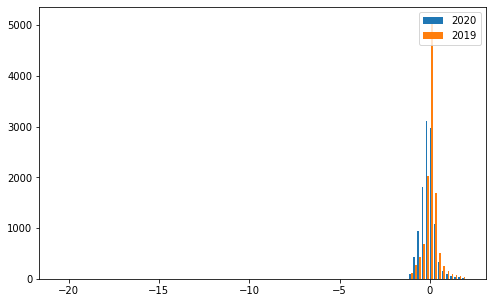

In [1169]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist([df_ingresos['inter_2020'][df_ingresos['inter_2020'].lt(2)],df_ingresos['inter_2019'][df_ingresos['inter_2019'].lt(2)]],100,label=['2020', '2019'])
plt.legend(loc='upper right')

Se puede ver una comparacion entre el crecimiento de 2018,2019 y 2020. De manera mas clara se puede notar que el año 2020 fue atipico y por esto no se deberia toar para el presente estudio.

<AxesSubplot:>

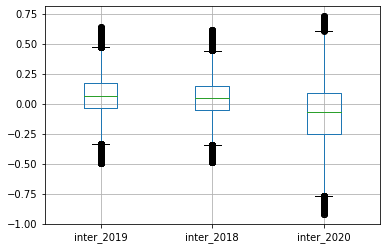

In [1170]:
cols = ['inter_2019', 'inter_2018','inter_2020']
Q1 = df_ingresos[cols].quantile(0.25)
Q3 = df_ingresos[cols].quantile(0.75)
IQR = Q3 - Q1

df_ingresos_no_out = df_ingresos[~((df_ingresos[cols] < (Q1 - 1.5 * IQR)) |(df_ingresos[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df_ingresos_no_out.boxplot(column=[ 'inter_2019', 'inter_2018','inter_2020'])

En el siguiente grafico se puede ver como existe un desbalanceo de clases, se tiene 8% de empresas de alto crecimiento y 92% de empresas normales.

<AxesSubplot:>

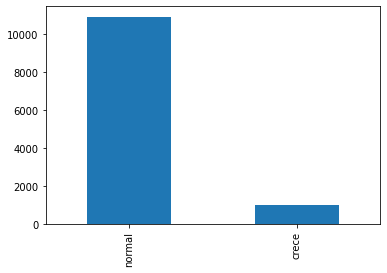

In [1171]:
df_ingresos['crecimiento_sin_20_class'].value_counts().plot(kind='bar')

In [1172]:
df_ingresos['crecimiento_sin_20_class'].value_counts(normalize=True)

normal    0.917081
crece     0.082919
Name: crecimiento_sin_20_class, dtype: float64

In [1173]:
df_ingresos['crecimiento_sin_20_class'].value_counts()

normal    10894
crece       985
Name: crecimiento_sin_20_class, dtype: int64

Se mantienen solo los campos calculados y las clases generadas.

In [1176]:
df_ingresos = df_ingresos[['ID_2017','inter_2020', 'inter_2019', 'inter_2018','crecimiento','crecimiento_sin_20_class']]

In [1177]:
df_ingresos

,ID_2017,inter_2020,inter_2019,inter_2018,crecimiento,crecimiento_sin_20_class
0,233151,-0.070846,0.211775,-0.174742,normal,normal
1,233207,-0.150616,0.082453,0.187696,normal,normal
2,233235,0.298777,-0.028447,0.102274,normal,normal
3,233284,-0.002528,0.085257,-0.010283,normal,normal
4,233291,0.020146,0.172139,0.028699,normal,normal
...,...,...,...,...,...,...
11874,21208275647,-0.015485,-0.215965,-0.830785,normal,normal
11875,21208493517,0.076539,6.022292,inf,normal,normal
11876,21210026868,-0.575117,-0.218506,1.066881,normal,normal
11877,21218950779,-0.385842,-0.240136,0.495874,normal,normal


Se integra la categoria de crecimiento al dataset total

In [1178]:
df_total=df_total.merge(df_ingresos,left_on='ID_2017',right_on='ID_2017')

### 5.4 Contratos con el estado

Se divide el dataset de contratos por años y se agrega el sufijo.

In [1179]:
df_contratos_2017  = df_contratos.loc[df_contratos['Año'].eq(2017)]
df_contratos_2018  = df_contratos.loc[df_contratos['Año'].eq(2018)]
df_contratos_2019  = df_contratos.loc[df_contratos['Año'].eq(2019)]
df_contratos_2020  = df_contratos.loc[df_contratos['Año'].eq(2020)]

df_contratos_2017.columns = df_contratos_2017.columns.map(lambda x: str(x) + '_2017')
df_contratos_2018.columns = df_contratos_2018.columns.map(lambda x: str(x) + '_2018')
df_contratos_2019.columns = df_contratos_2019.columns.map(lambda x: str(x) + '_2019')
df_contratos_2020.columns = df_contratos_2020.columns.map(lambda x: str(x) + '_2020')


Se verifica que no existan registros duplicados

In [1180]:
 df_contratos_2017[df_contratos_2017.duplicated('ID_2017')]

,ID_2017,Año_2017,Cuantia_2017,Contratos_2017


Se integran los contratos al dataset total

In [1181]:
df_total = df_total.merge(df_contratos_2017,how='left',left_on='ID_2017',right_on='ID_2017')
df_total = df_total.merge(df_contratos_2018,how='left',left_on='ID_2017',right_on='ID_2018')
df_total = df_total.merge(df_contratos_2019,how='left',left_on='ID_2017',right_on='ID_2019')
df_total = df_total.merge(df_contratos_2020,how='left',left_on='ID_2017',right_on='ID_2020')

In [1182]:
 df_total.head()

,AC_2017,ACC11H_2017,ACC113_2017,ACC114_2017,ACC118_2017,ACC211_2017,PSC224_2017,PSC225_2017,PSC228_2017,PSL228_2017,PTT131_2017,PTT136_2017,PTT237_2017,RAG_2017,RAGE51_2017,RAGE55_2017,RAIE_2017,RAIX_2017,RAIXFI_2017,RAX_2017,RAXFI_2017,ID_2017,AC_2018,ACC11H_2018,ACC113_2018,ACC114_2018,ACC118_2018,ACC211_2018,PSC224_2018,PSC225_2018,PSC228_2018,PSL228_2018,PTT131_2018,PTT136_2018,PTT237_2018,RAG_2018,RAGE51_2018,RAGE55_2018,RAIE_2018,RAIX_2018,RAIXFI_2018,RAX_2018,RAXFI_2018,ID_2018_x,AC_2019,ACC11H_2019,ACC113_2019,ACC114_2019,ACC118_2019,ACC211_2019,PSC224_2019,PSC225_2019,PSC228_2019,PSL228_2019,PTT131_2019,PTT136_2019,PTT237_2019,RAG_2019,RAGE51_2019,RAGE55_2019,RAIE_2019,RAIX_2019,RAIXFI_2019,RAX_2019,RAXFI_2019,ID_2019_x,ID_2020_x,AC_2020,ACC11H_2020,ACC113_2020,ACC114_2020,ACC118_2020,ACC211_2020,PSC224_2020,PSC225_2020,PSC228_2020,PSL228_2020,PTT131_2020,PTT136_2020,PTT237_2020,RAG_2020,RAGE51_2020,RAGE55_2020,RAIE_2020,RAIX_2020,RAIXFI_2020,RAX_2020,RAXFI_2020,inter_2020,inter_2019,inter_2018,crecimiento,crecimiento_sin_20_class,Año_2017,Cuantia_2017,Contratos_2017,ID_2018_y,Año_2018,Cuantia_2018,Contratos_2018,ID_2019_y,Año_2019,Cuantia_2019,Contratos_2019,ID_2020_y,Año_2020,Cuantia_2020,Contratos_2020
0,12319179.0,750592.0,2989104.0,3.616500e+05,5.959210e+05,2174610.0,320181.0,110676.0,1397693.0,2.538580e+05,3324553.0,542521.0,2823561.0,10009626.0,1220785.0,174829.0,10634286.0,6.452300e+04,64523.000000,53952.0,53952.0,233151,12286936.0,1.138620e+06,1853220.0,5.806200e+05,9934.000000,1795473.0,253591.0,108322.0,1385609.0,8.046790e+05,3324553.0,367998.0,3311831.0,8216547.0,1588768.0,26969.0,8776030.0,45224.000000,45224.000000,35644.0,35644.0,233151,15117256.0,1.059902e+06,3674339.0,5.163160e+05,633543.000000,918153.0,484113.0,1.714220e+05,1.261597e+06,2.651383e+06,3324553.0,356988.0,3643028.0,10074663.0,1603282.0,25187.0,10634575.0,5.209800e+04,52098.000000,34381.000000,3.438100e+04,233151,233151,10955802.0,833100.0,794850.0,455740.0,291381.0,3151538.0,100674.0,132863.0,2922132.0,1610072.0,3141422.0,105853.0,NaN,9545765.0,899135.0,584135.0,9881160.0,78337.0,59752.0,30311.0,43727.0,-0.070846,0.211775,-0.174742,normal,normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8045288.0,2882.0,1088517.0,1.625805e+06,1.127921e+06,668214.0,156635.0,278335.0,205401.0,1.042956e+06,1200000.0,266283.0,120728.0,6382751.0,1584084.0,51837.0,6816970.0,-1.252612e-06,73842.887610,-250839.0,-250839.0,233207,7849988.0,3.185000e+03,1291758.0,1.442915e+06,498015.927072,1055453.0,189654.0,233359.0,177069.0,7.817140e+05,1200000.0,-212337.0,387011.0,8048884.0,2948522.0,101057.0,8096488.0,-0.000456,294223.420381,-190492.0,-190492.0,233207,7973634.0,3.635691e+05,1640999.0,1.342957e+06,683697.654042,910727.0,207048.0,2.527720e+05,1.542860e+05,7.024440e+05,1200000.0,621859.0,0.0,7807225.0,2583769.0,83047.0,8764069.0,-1.350418e-08,109867.199837,-160780.000000,-1.607800e+05,233207,233207,8619100.0,NaN,1846043.0,1388758.0,NaN,1341216.0,175367.0,256037.0,28147.0,847238.0,1200000.0,401428.0,621859.0,6809003.0,2390691.0,77455.0,7444058.0,NaN,NaN,NaN,NaN,-0.150616,0.082453,0.187696,normal,normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12290646.0,35102.0,3109290.0,-3.353510e+05,6.368788e+05,63624.0,465787.0,3627.0,64713.0,5.456095e+05,3532975.0,-1037480.0,3027545.0,1329810.0,468493.0,806327.0,1074982.0,-9.440740e-07,75459.084266,-54990.0,-54990.0,233235,11856776.0,5.169069e+05,1699602.0,-7.502620e+05,329552.130290,111715.0,81422.0,5099.0,1864.0,2.849380e+06,3532975.0,469239.0,1637555.0,405477.0,396064.0,9413.0,1184925.0,-0.000520,-163220.751494,0.0,0.0,233235,12114680.0,4.670521e+05,1877765.0,-5.810397e+05,769405.798908,432463.0,51234.0,2.306632e+05,-3.607718e+04,2.979303e+06,3532975.0,300791.0,2106794.0,615555.0,596826.0,18729.0,1151218.0,-1.088483e-08,-128998.800163,307.553569,5.459689e+11,233235,233235,12161855.0,NaN,1991756.0,NaN,NaN,594170.0,104856.0,NaN,137.0,NaN,3532975.0,449865.0,2106793.0,667185.0,470667.0,1

Se puede observar mediante el histograma, que la mayoria de registros no tienen contratos.

<AxesSubplot:>

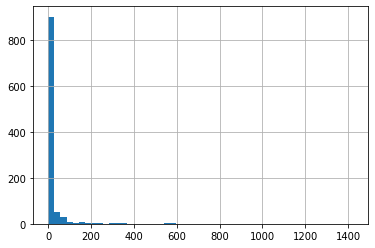

In [1183]:
df_total['Contratos_2017'].hist(bins=50)

### Datos de las empresas

Se elimina los datos duplicados del dataset de datos de la empresa

In [1184]:
df_datos_empresa=df_datos_empresa.drop_duplicates(subset=['ID'])
df_datos_empresa[df_datos_empresa.duplicated('ID')]

,ID,TIPOLOGIA,EMPLEADOS,CONSEJOAPRO,OBJETOSOCIAL,CIIU,CONSTITUCION,VIGENCIA,ESTADO,TIPOSOC,DEPARTAMENTO,LOCALIDAD,PAISMATRIZ,AUDITOR,INFORMEAUDITORIA,OPINIONAUDITOR,PARTICIPACIONES


Se integra al dataset principal

In [1185]:
df_total = df_total.merge(df_datos_empresa,how='left',left_on='ID_2017',right_on='ID')
df_total.head(5)

,AC_2017,ACC11H_2017,ACC113_2017,ACC114_2017,ACC118_2017,ACC211_2017,PSC224_2017,PSC225_2017,PSC228_2017,PSL228_2017,PTT131_2017,PTT136_2017,PTT237_2017,RAG_2017,RAGE51_2017,RAGE55_2017,RAIE_2017,RAIX_2017,RAIXFI_2017,RAX_2017,RAXFI_2017,ID_2017,AC_2018,ACC11H_2018,ACC113_2018,ACC114_2018,ACC118_2018,ACC211_2018,PSC224_2018,PSC225_2018,PSC228_2018,PSL228_2018,PTT131_2018,PTT136_2018,PTT237_2018,RAG_2018,RAGE51_2018,RAGE55_2018,RAIE_2018,RAIX_2018,RAIXFI_2018,RAX_2018,RAXFI_2018,ID_2018_x,AC_2019,ACC11H_2019,ACC113_2019,ACC114_2019,ACC118_2019,ACC211_2019,PSC224_2019,PSC225_2019,PSC228_2019,PSL228_2019,PTT131_2019,PTT136_2019,PTT237_2019,RAG_2019,RAGE51_2019,RAGE55_2019,RAIE_2019,RAIX_2019,RAIXFI_2019,RAX_2019,RAXFI_2019,ID_2019_x,ID_2020_x,AC_2020,ACC11H_2020,ACC113_2020,ACC114_2020,ACC118_2020,ACC211_2020,PSC224_2020,PSC225_2020,PSC228_2020,PSL228_2020,PTT131_2020,PTT136_2020,PTT237_2020,RAG_2020,RAGE51_2020,RAGE55_2020,RAIE_2020,RAIX_2020,RAIXFI_2020,RAX_2020,RAXFI_2020,inter_2020,inter_2019,inter_2018,crecimiento,crecimiento_sin_20_class,Año_2017,Cuantia_2017,Contratos_2017,ID_2018_y,Año_2018,Cuantia_2018,Contratos_2018,ID_2019_y,Año_2019,Cuantia_2019,Contratos_2019,ID_2020_y,Año_2020,Cuantia_2020,Contratos_2020,ID,TIPOLOGIA,EMPLEADOS,CONSEJOAPRO,OBJETOSOCIAL,CIIU,CONSTITUCION,VIGENCIA,ESTADO,TIPOSOC,DEPARTAMENTO,LOCALIDAD,PAISMATRIZ,AUDITOR,INFORMEAUDITORIA,OPINIONAUDITOR,PARTICIPACIONES
0,12319179.0,750592.0,2989104.0,3.616500e+05,5.959210e+05,2174610.0,320181.0,110676.0,1397693.0,2.538580e+05,3324553.0,542521.0,2823561.0,10009626.0,1220785.0,174829.0,10634286.0,6.452300e+04,64523.000000,53952.0,53952.0,233151,12286936.0,1.138620e+06,1853220.0,5.806200e+05,9934.000000,1795473.0,253591.0,108322.0,1385609.0,8.046790e+05,3324553.0,367998.0,3311831.0,8216547.0,1588768.0,26969.0,8776030.0,45224.000000,45224.000000,35644.0,35644.0,233151,15117256.0,1.059902e+06,3674339.0,5.163160e+05,633543.000000,918153.0,484113.0,1.714220e+05,1.261597e+06,2.651383e+06,3324553.0,356988.0,3643028.0,10074663.0,1603282.0,25187.0,10634575.0,5.209800e+04,52098.000000,34381.000000,3.438100e+04,233151,233151,10955802.0,833100.0,794850.0,455740.0,291381.0,3151538.0,100674.0,132863.0,2922132.0,1610072.0,3141422.0,105853.0,NaN,9545765.0,899135.0,584135.0,9881160.0,78337.0,59752.0,30311.0,43727.0,-0.070846,0.211775,-0.174742,normal,normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,233151,SOCIEDAD COMERCIAL/INDUSTRIAL,44.0,Si,"PLANEACION, SISTEMATIZACION Y EJECUCION DE PRO...","G4741 - Comercio al por menor de computadores,...",1972-11-22,NaN,ACTIVA,08. SOCIEDAD POR ACCIONES SIMPLIFICADA SAS,BOGOTA D.C.,BOGOTA-D.C.-BOGOTA D.C.,NaN,Si,Si,03. LIMPIO,No
1,8045288.0,2882.0,1088517.0,1.625805e+06,1.127921e+06,668214.0,156635.0,278335.0,205401.0,1.042956e+06,1200000.0,266283.0,120728.0,6382751.0,1584084.0,51837.0,6816970.0,-1.252612e-06,73842.887610,-250839.0,-250839.0,233207,7849988.0,3.185000e+03,1291758.0,1.442915e+06,498015.927072,1055453.0,189654.0,233359.0,177069.0,7.817140e+05,1200000.0,-212337.0,387011.0,8048884.0,2948522.0,101057.0,8096488.0,-0.000456,294223.420381,-190492.0,-190492.0,233207,7973634.0,3.635691e+05,1640999.0,1.342957e+06,683697.654042,910727.0,207048.0,2.527720e+05,1.542860e+05,7.024440e+05,1200000.0,621859.0,0.0,7807225.0,2583769.0,83047.0,8764069.0,-1.350418e-08,109867.199837,-160780.000000,-1.607800e+05,233207,233207,8619100.0,NaN,1846043.0,1388758.0,NaN,1341216.0,175367.0,256037.0,28147.0,847238.0,1200000.0,401428.0,621859.0,6809003.0,2390691.0,77455.0,7444058.0,NaN,NaN,NaN,NaN,-0.150616,0.082453,0.187696,normal,normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,233207,SOCIEDAD COMERCIAL/INDUSTRIAL,115.0,Si,LA SOCIEDAD PODRÁ DESARROLLAR CUALQUIER ACTIVI...,"C2930 - Fabricación de partes, piezas (autopar...",1972-12-05,NaN,ACTIVA,08. SOCIEDAD POR ACCIONES SIMPLIFICADA SAS,BOGOTA D.C.,BOGOTA-D.C.-BOGOTA D.C.,NaN,Si,Si,03. LIMPIO,No
2,12290646.0,35102.0,3109290.0,-3.353510e+05,6.368788e+05,63624.0,46578

In [1186]:
df_total[df_total.duplicated('ID_2017')]

,AC_2017,ACC11H_2017,ACC113_2017,ACC114_2017,ACC118_2017,ACC211_2017,PSC224_2017,PSC225_2017,PSC228_2017,PSL228_2017,PTT131_2017,PTT136_2017,PTT237_2017,RAG_2017,RAGE51_2017,RAGE55_2017,RAIE_2017,RAIX_2017,RAIXFI_2017,RAX_2017,RAXFI_2017,ID_2017,AC_2018,ACC11H_2018,ACC113_2018,ACC114_2018,ACC118_2018,ACC211_2018,PSC224_2018,PSC225_2018,PSC228_2018,PSL228_2018,PTT131_2018,PTT136_2018,PTT237_2018,RAG_2018,RAGE51_2018,RAGE55_2018,RAIE_2018,RAIX_2018,RAIXFI_2018,RAX_2018,RAXFI_2018,ID_2018_x,AC_2019,ACC11H_2019,ACC113_2019,ACC114_2019,ACC118_2019,ACC211_2019,PSC224_2019,PSC225_2019,PSC228_2019,PSL228_2019,PTT131_2019,PTT136_2019,PTT237_2019,RAG_2019,RAGE51_2019,RAGE55_2019,RAIE_2019,RAIX_2019,RAIXFI_2019,RAX_2019,RAXFI_2019,ID_2019_x,ID_2020_x,AC_2020,ACC11H_2020,ACC113_2020,ACC114_2020,ACC118_2020,ACC211_2020,PSC224_2020,PSC225_2020,PSC228_2020,PSL228_2020,PTT131_2020,PTT136_2020,PTT237_2020,RAG_2020,RAGE51_2020,RAGE55_2020,RAIE_2020,RAIX_2020,RAIXFI_2020,RAX_2020,RAXFI_2020,inter_2020,inter_2019,inter_2018,crecimiento,crecimiento_sin_20_class,Año_2017,Cuantia_2017,Contratos_2017,ID_2018_y,Año_2018,Cuantia_2018,Contratos_2018,ID_2019_y,Año_2019,Cuantia_2019,Contratos_2019,ID_2020_y,Año_2020,Cuantia_2020,Contratos_2020,ID,TIPOLOGIA,EMPLEADOS,CONSEJOAPRO,OBJETOSOCIAL,CIIU,CONSTITUCION,VIGENCIA,ESTADO,TIPOSOC,DEPARTAMENTO,LOCALIDAD,PAISMATRIZ,AUDITOR,INFORMEAUDITORIA,OPINIONAUDITOR,PARTICIPACIONES


### 5.5 Casos judiciales

Se separa el dataset de casos judiciales en sus correspondientes años.

In [1187]:
df_rama_judicial_2017  = df_rama_judicial.loc[df_rama_judicial['AÑO'].eq(2017)]
df_rama_judicial_2018  = df_rama_judicial.loc[df_rama_judicial['AÑO'].eq(2018)]
df_rama_judicial_2019  = df_rama_judicial.loc[df_rama_judicial['AÑO'].eq(2019)]

In [1188]:
df_rama_judicial_2017.columns = df_rama_judicial_2017.columns.map(lambda x: str(x) + '_2017')
df_rama_judicial_2018.columns = df_rama_judicial_2018.columns.map(lambda x: str(x) + '_2018')
df_rama_judicial_2019.columns = df_rama_judicial_2019.columns.map(lambda x: str(x) + '_2019')

Se suman todos los casos judiciales para tener un registro por empresa por año.

In [1189]:
df_rama_judicial_2017=df_rama_judicial_2017.groupby(['ID_2017'],as_index=False).sum()
df_rama_judicial_2018=df_rama_judicial_2018.groupby(['ID_2018'],as_index=False).sum()
df_rama_judicial_2019=df_rama_judicial_2019.groupby(['ID_2019'],as_index=False).sum()

In [1190]:
df_rama_judicial_2017

,ID_2017,AÑO_2017,NUMINCIDENTES_2017
0,236266,2017,1
1,238688,2017,1
2,239332,2017,2
3,240557,2017,1
4,240578,2017,1
...,...,...,...
433,21002367991,2017,1
434,21009203215,2017,1
435,21020335855,2017,1
436,21065382586,2017,1


In [1191]:
df_rama_judicial_2017[df_rama_judicial_2017.duplicated('ID_2017')]

,ID_2017,AÑO_2017,NUMINCIDENTES_2017


Se integra el dataset de los casos judiciales al dataset principal.

In [1192]:
df_total = df_total.merge(df_rama_judicial_2017,how='left',left_on='ID_2017',right_on='ID_2017')
df_total = df_total.merge(df_rama_judicial_2018,how='left',left_on='ID_2017',right_on='ID_2018')
df_total = df_total.merge(df_rama_judicial_2019,how='left',left_on='ID_2017',right_on='ID_2019')

In [1193]:
df_total[df_total.duplicated('ID_2017')]

,AC_2017,ACC11H_2017,ACC113_2017,ACC114_2017,ACC118_2017,ACC211_2017,PSC224_2017,PSC225_2017,PSC228_2017,PSL228_2017,PTT131_2017,PTT136_2017,PTT237_2017,RAG_2017,RAGE51_2017,RAGE55_2017,RAIE_2017,RAIX_2017,RAIXFI_2017,RAX_2017,RAXFI_2017,ID_2017,AC_2018,ACC11H_2018,ACC113_2018,ACC114_2018,ACC118_2018,ACC211_2018,PSC224_2018,PSC225_2018,PSC228_2018,PSL228_2018,PTT131_2018,PTT136_2018,PTT237_2018,RAG_2018,RAGE51_2018,RAGE55_2018,RAIE_2018,RAIX_2018,RAIXFI_2018,RAX_2018,RAXFI_2018,ID_2018_x,AC_2019,ACC11H_2019,ACC113_2019,ACC114_2019,ACC118_2019,ACC211_2019,PSC224_2019,PSC225_2019,PSC228_2019,PSL228_2019,PTT131_2019,PTT136_2019,PTT237_2019,RAG_2019,RAGE51_2019,RAGE55_2019,RAIE_2019,RAIX_2019,RAIXFI_2019,RAX_2019,RAXFI_2019,ID_2019_x,ID_2020_x,AC_2020,ACC11H_2020,ACC113_2020,ACC114_2020,ACC118_2020,ACC211_2020,PSC224_2020,PSC225_2020,PSC228_2020,PSL228_2020,PTT131_2020,PTT136_2020,PTT237_2020,RAG_2020,RAGE51_2020,RAGE55_2020,RAIE_2020,RAIX_2020,RAIXFI_2020,RAX_2020,RAXFI_2020,inter_2020,inter_2019,inter_2018,crecimiento,crecimiento_sin_20_class,Año_2017,Cuantia_2017,Contratos_2017,ID_2018_y,Año_2018,Cuantia_2018,Contratos_2018,ID_2019_y,Año_2019,Cuantia_2019,Contratos_2019,ID_2020_y,Año_2020,Cuantia_2020,Contratos_2020,ID,TIPOLOGIA,EMPLEADOS,CONSEJOAPRO,OBJETOSOCIAL,CIIU,CONSTITUCION,VIGENCIA,ESTADO,TIPOSOC,DEPARTAMENTO,LOCALIDAD,PAISMATRIZ,AUDITOR,INFORMEAUDITORIA,OPINIONAUDITOR,PARTICIPACIONES,AÑO_2017,NUMINCIDENTES_2017,ID_2018,AÑO_2018,NUMINCIDENTES_2018,ID_2019,AÑO_2019,NUMINCIDENTES_2019


### Modificacion de estatutos

In [1194]:
df_modificacion_statutos.head()

,ID,AÑOPUBLICACION,PUBLICACIONES
0,381800313,2017,4
1,69495050,2018,4
2,21000198854,2018,2
3,310320173,2019,8
4,2126217,2018,1


Para el dataset del numero de modificaciones de estatutos, se separan los registros por año, se etiquetan y se agrupa el numero de publicaciones por año.

In [1195]:
df_modificacion_statutos_2017  = df_modificacion_statutos.loc[df_modificacion_statutos['AÑOPUBLICACION'].eq(2017)]
df_modificacion_statutos_2018  = df_modificacion_statutos.loc[df_modificacion_statutos['AÑOPUBLICACION'].eq(2018)]
df_modificacion_statutos_2019  = df_modificacion_statutos.loc[df_modificacion_statutos['AÑOPUBLICACION'].eq(2019)]

df_modificacion_statutos_2017.columns = df_modificacion_statutos_2017.columns.map(lambda x: str(x) + '_2017')
df_modificacion_statutos_2018.columns = df_modificacion_statutos_2018.columns.map(lambda x: str(x) + '_2018')
df_modificacion_statutos_2019.columns = df_modificacion_statutos_2019.columns.map(lambda x: str(x) + '_2019')

df_modificacion_statutos_2017=df_modificacion_statutos_2017.groupby(['ID_2017'],as_index=False).sum()
df_modificacion_statutos_2018=df_modificacion_statutos_2018.groupby(['ID_2018'],as_index=False).sum()
df_modificacion_statutos_2019=df_modificacion_statutos_2019.groupby(['ID_2019'],as_index=False).sum()

Se integra al dataset principal.

In [1196]:
df_total = df_total.merge(df_modificacion_statutos_2017,how='left',left_on='ID_2017',right_on='ID_2017')
df_total = df_total.merge(df_modificacion_statutos_2018,how='left',left_on='ID_2017',right_on='ID_2018')
df_total = df_total.merge(df_modificacion_statutos_2019,how='left',left_on='ID_2017',right_on='ID_2019')

In [1197]:
df_total.head(5)

,AC_2017,ACC11H_2017,ACC113_2017,ACC114_2017,ACC118_2017,ACC211_2017,PSC224_2017,PSC225_2017,PSC228_2017,PSL228_2017,PTT131_2017,PTT136_2017,PTT237_2017,RAG_2017,RAGE51_2017,RAGE55_2017,RAIE_2017,RAIX_2017,RAIXFI_2017,RAX_2017,RAXFI_2017,ID_2017,AC_2018,ACC11H_2018,ACC113_2018,ACC114_2018,ACC118_2018,ACC211_2018,PSC224_2018,PSC225_2018,PSC228_2018,PSL228_2018,PTT131_2018,PTT136_2018,PTT237_2018,RAG_2018,RAGE51_2018,RAGE55_2018,RAIE_2018,RAIX_2018,RAIXFI_2018,RAX_2018,RAXFI_2018,ID_2018_x,AC_2019,ACC11H_2019,ACC113_2019,ACC114_2019,ACC118_2019,ACC211_2019,PSC224_2019,PSC225_2019,PSC228_2019,PSL228_2019,PTT131_2019,PTT136_2019,PTT237_2019,RAG_2019,RAGE51_2019,RAGE55_2019,RAIE_2019,RAIX_2019,RAIXFI_2019,RAX_2019,RAXFI_2019,ID_2019_x,ID_2020_x,AC_2020,ACC11H_2020,ACC113_2020,ACC114_2020,ACC118_2020,ACC211_2020,PSC224_2020,PSC225_2020,PSC228_2020,PSL228_2020,PTT131_2020,PTT136_2020,PTT237_2020,RAG_2020,RAGE51_2020,RAGE55_2020,RAIE_2020,RAIX_2020,RAIXFI_2020,RAX_2020,RAXFI_2020,inter_2020,inter_2019,inter_2018,crecimiento,crecimiento_sin_20_class,Año_2017,Cuantia_2017,Contratos_2017,ID_2018_y,Año_2018,Cuantia_2018,Contratos_2018,ID_2019_y,Año_2019,Cuantia_2019,Contratos_2019,ID_2020_y,Año_2020,Cuantia_2020,Contratos_2020,ID,TIPOLOGIA,EMPLEADOS,CONSEJOAPRO,OBJETOSOCIAL,CIIU,CONSTITUCION,VIGENCIA,ESTADO,TIPOSOC,DEPARTAMENTO,LOCALIDAD,PAISMATRIZ,AUDITOR,INFORMEAUDITORIA,OPINIONAUDITOR,PARTICIPACIONES,AÑO_2017,NUMINCIDENTES_2017,ID_2018_x,AÑO_2018,NUMINCIDENTES_2018,ID_2019_x,AÑO_2019,NUMINCIDENTES_2019,AÑOPUBLICACION_2017,PUBLICACIONES_2017,ID_2018_y,AÑOPUBLICACION_2018,PUBLICACIONES_2018,ID_2019_y,AÑOPUBLICACION_2019,PUBLICACIONES_2019
0,1.231918e+07,7.505920e+05,2.989104e+06,3.616500e+05,5.959210e+05,2174610.000,320181.0,110676.000000,1.397693e+06,2.538580e+05,3324553.0,542521.000,2823561.00,1.000963e+07,1220785.000,1.748290e+05,10634286.0,6.452300e+04,64523.000000,53952.000,53952.000000,233151,1.228694e+07,1.138620e+06,1.853220e+06,5.806200e+05,9.934000e+03,1.795473e+06,253591.0,108322.000000,1.385609e+06,8.046790e+05,3324553.0,367998.000,3.311831e+06,8.216547e+06,1588768.000,2.696900e+04,8776030.00,4.522400e+04,4.522400e+04,35644.000,35644.000000,233151,15117256.0,1.059902e+06,3674339.0,5.163160e+05,6.335430e+05,918153.0,484113.0,1.714220e+05,1.261597e+06,2.651383e+06,3324553.0,356988.0,3643028.0,10074663.0,1603282.0,25187.0,10634575.0,5.209800e+04,5.209800e+04,34381.000000,3.438100e+04,233151,233151,1.095580e+07,833100.0,794850.0,455740.0,2.913810e+05,3151538.0,100674.0,132863.0,2922132.0,1610072.0,3141422.0,105853.0,NaN,9545765.0,899135.0,584135.0,9881160.0,78337.0,59752.0,30311.0,43727.0,-0.070846,0.211775,-0.174742,normal,normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,233151,SOCIEDAD COMERCIAL/INDUSTRIAL,44.0,Si,"PLANEACION, SISTEMATIZACION Y EJECUCION DE PRO...","G4741 - Comercio al por menor de computadores,...",1972-11-22,NaN,ACTIVA,08. SOCIEDAD POR ACCIONES SIMPLIFICADA SAS,BOGOTA D.C.,BOGOTA-D.C.-BOGOTA D.C.,NaN,Si,Si,03. LIMPIO,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.331510e+05,2018.0,3.0,2.331510e+05,2019.0,7.0
1,8.045288e+06,2.882000e+03,1.088517e+06,1.625805e+06,1.127921e+06,668214.000,156635.0,278335.000000,2.054010e+05,1.042956e+06,1200000.0,266283.000,120728.00,6.382751e+06,1584084.000,5.183700e+04,6816970.0,-1.252612e-06,73842.887610,-250839.000,-250839.000000,233207,7.849988e+06,3.185000e+03,1.291758e+06,1.442915e+06,4.980159e+05,1.055453e+06,189654.0,233359.000000,1.770690e+05,7.817140e+05,1200000.0,-212337.000,3.870110e+05,8.048884e+06,2948522.000,1.010570e+05,8096488.00,-4.557814e-04,2.942234e+05,-190492.000,-190492.000000,233207,7973634.0,3.635691e+05,1640999.0,1.342957e+06,6.836977e+05,910727.0,207048.0,2.527720e+05,1.542860e+05,7.024440e+05,1200000.0,621859.0,0.0,7807225.0,2583769.0,83047.0,8764069.0,-1.350418e-08,1.098672e+05,-160780.000000,-1.607800e+05,233207,233207,8.619100e+06,NaN,1846043.0,1388758.0,NaN,1341216.0,175367.0,256037.0,28147.0,847238.0,1200000.0,401428.0,621859.0,68

## 6. Análisis dataset completo

Se eliminan los campos que se usaron para los joins de datasets y los que tienen datos de años

In [1198]:
df_total=df_total.drop(['ID_2018_y','ID_2019_y','ID_2019_x','ID_2020_x','ID_2018_x','ID_2017'],axis=1)

In [1199]:
df_total=df_total.drop(['Año_2018','Año_2019','Año_2020','Año_2017','AÑO_2017','AÑO_2018','AÑO_2019','ID_2020_y'],axis=1)

In [1200]:
df_total=df_total.drop(['AÑOPUBLICACION_2017','AÑOPUBLICACION_2018','AÑOPUBLICACION_2019'],axis=1)

In [1201]:
df_total = df_total.drop('RAIE_2017', 1)
df_total = df_total.drop('RAIE_2018', 1)
df_total = df_total.drop('RAIE_2019', 1)
df_total = df_total.drop('RAIE_2020', 1)

Ahora se muestra un resumen de los campos categoricos, se va a ir analizando cada campo para ver si es relevante en relacion al crecimiento.

In [1203]:
 df_total.describe(include='object')

,crecimiento,crecimiento_sin_20_class,TIPOLOGIA,CONSEJOAPRO,OBJETOSOCIAL,CIIU,VIGENCIA,ESTADO,TIPOSOC,DEPARTAMENTO,LOCALIDAD,PAISMATRIZ,AUDITOR,INFORMEAUDITORIA,OPINIONAUDITOR,PARTICIPACIONES
count,11879,11879,11879,11879,11877,11879,4589,11879,11879,11879,11878,256,11879,11481,11329,9852
unique,2,2,5,2,9687,389,3269,4,8,30,260,44,2,2,4,2
top,normal,normal,SOCIEDAD COMERCIAL/INDUSTRIAL,Si,CONSTRUCCION DE EDIFICIOS RESIDENCIALES,L6810 - Actividades inmobiliarias realizadas c...,2050-12-31 00:00:00,ACTIVA,08. SOCIEDAD POR ACCIONES SIMPLIFICADA SAS,BOGOTA D.C.,BOGOTA-D.C.-BOGOTA D.C.,249 - ESTADOS UNIDOS,Si,Si,03. LIMPIO,No
freq,11571,10894,11603,9389,98,1573,313,11855,7280,5634,4699,56,11738,11329,11163,8105


Se puede ver que las empresas de alto crecimiento estan distribuidas en sociedades comerciales y entidades extrajeras.

<AxesSubplot:xlabel='count', ylabel='TIPOLOGIA'>

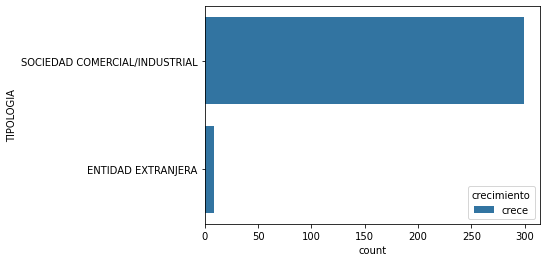

In [1204]:
sns.countplot(y="TIPOLOGIA", hue="crecimiento",  data=df_total[df_total['crecimiento']=='crece'])

<AxesSubplot:xlabel='count', ylabel='CONSEJOAPRO'>

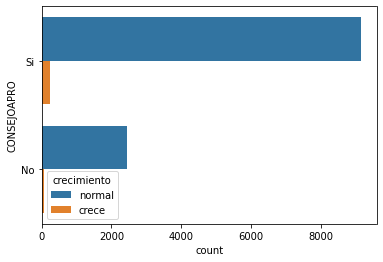

In [1205]:
sns.countplot(y="CONSEJOAPRO", hue="crecimiento", data=df_total)

ACTIVA                         0.997980
ACUERDO DE REESTRUCTURACIÓN    0.001010
EN ETAPA PREOPERATIVA          0.000589
ACUERDO DE REORGANIZACION      0.000421
Name: ESTADO, dtype: float64

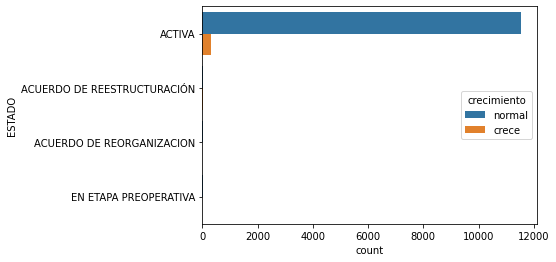

In [1206]:
sns.countplot(y="ESTADO", hue="crecimiento", data=df_total)
df_total['ESTADO'].value_counts(normalize=True)


Al ser casi todos los registros de empresas activas s elimina este campo

In [1207]:
df_total=df_total.drop(['ESTADO'],axis=1)

<AxesSubplot:xlabel='count', ylabel='TIPOSOC'>

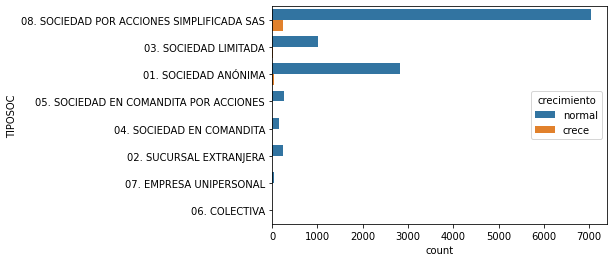

In [1208]:

sns.countplot(y="TIPOSOC", hue="crecimiento", data=df_total)


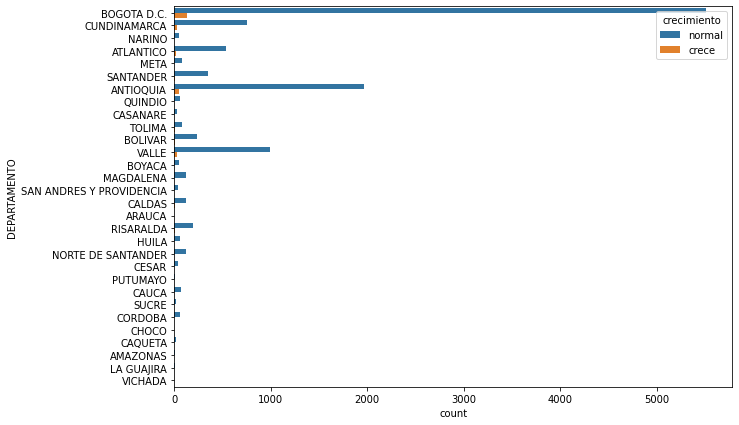

In [1209]:
countplt, ax = plt.subplots(figsize = (10,7))
ax =sns.countplot(y="DEPARTAMENTO", hue="crecimiento", data=df_total)

<AxesSubplot:xlabel='count', ylabel='OPINIONAUDITOR'>

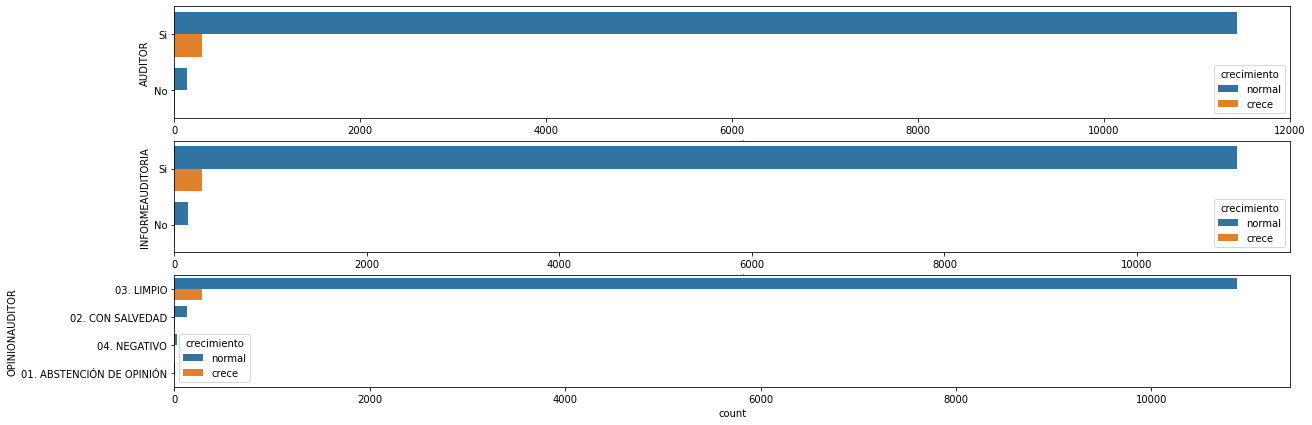

In [1210]:
 fig,ax = plt.subplots(3,figsize = (20,7))
sns.countplot(ax=ax[0],y="AUDITOR", hue="crecimiento", data=df_total)
sns.countplot(ax=ax[1],y="INFORMEAUDITORIA", hue="crecimiento", data=df_total)
sns.countplot(ax=ax[2],y="OPINIONAUDITOR", hue="crecimiento", data=df_total)


<AxesSubplot:xlabel='count', ylabel='PAISMATRIZ'>

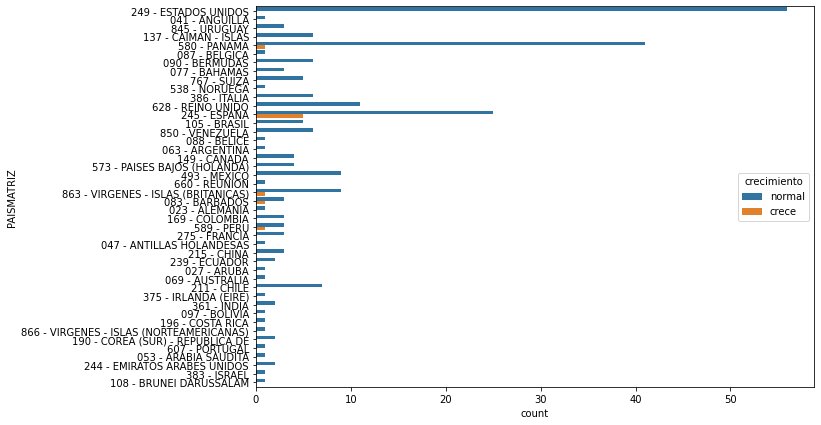

In [1211]:
countplt, ax = plt.subplots(figsize = (10,7))

sns.countplot(y="PAISMATRIZ", hue="crecimiento", data=df_total)

### 6.1 Datos faltantes

Se vuelve a comprobar los campos nulos para los datos integrados.

In [1202]:
percent_missing = df_total.isnull().sum() * 100 / len(df_total)
missing_value_df = pd.DataFrame({'column_name': df_total.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True,ascending=False)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(missing_value_df)

,column_name,percent_missing
PAISMATRIZ,PAISMATRIZ,97.844936
NUMINCIDENTES_2017,NUMINCIDENTES_2017,96.455931
NUMINCIDENTES_2018,NUMINCIDENTES_2018,95.765637
Cuantia_2020,Cuantia_2020,95.580436
Contratos_2020,Contratos_2020,95.580436
NUMINCIDENTES_2019,NUMINCIDENTES_2019,95.504672
Contratos_2018,Contratos_2018,92.019530
Cuantia_2018,Cuantia_2018,92.019530
Cuantia_2019,Cuantia_2019,91.766984
Contratos_2019,Contratos_2019,91.766984


Para los campos con valores nulos, se rellena el pais matriz con Colombia puesto que este dato tiene valores solo para los paises extrajeros. Para los demas valores numéricos se asume que si no tienen valores es porque son 0. Para los valores categoricos se rellena con la moda. Para el numero de empleados se llena con la mediana debido a que tiene valores outliers. Para la fecha de constitucion se tomo la mediana de las fechas de constitucion.

Se elimina los campos de vigencia porque contiene fechas al futuro y el objeto social porque en el campo CIIU se tiene mas estandarizado.

In [1212]:
df_total['PAISMATRIZ']= df_total['PAISMATRIZ'].fillna('COLOMBIA')
df_total['NUMINCIDENTES_2017']= df_total['NUMINCIDENTES_2017'].fillna(0)
df_total['NUMINCIDENTES_2018']= df_total['NUMINCIDENTES_2018'].fillna(0)
df_total['NUMINCIDENTES_2019']= df_total['NUMINCIDENTES_2019'].fillna(0)
df_total['Cuantia_2020']= df_total['Cuantia_2020'].fillna(0)
df_total['Contratos_2020']= df_total['Contratos_2020'].fillna(0)
df_total['Cuantia_2018']= df_total['Cuantia_2018'].fillna(0)
df_total['Contratos_2018']= df_total['Contratos_2018'].fillna(0)
df_total['Cuantia_2019']= df_total['Cuantia_2019'].fillna(0)
df_total['Cuantia_2017']= df_total['Cuantia_2017'].fillna(0)
df_total['Contratos_2017']= df_total['Contratos_2017'].fillna(0)
df_total['Contratos_2019']= df_total['Contratos_2017'].fillna(0)
df_total['PUBLICACIONES_2017']= df_total['PUBLICACIONES_2017'].fillna(0)
df_total['PUBLICACIONES_2018']= df_total['PUBLICACIONES_2018'].fillna(0)
df_total['PUBLICACIONES_2019']= df_total['PUBLICACIONES_2019'].fillna(0)
df_total['PARTICIPACIONES']= df_total['PARTICIPACIONES'].fillna(df_total['PARTICIPACIONES'].mode()[0])
df_total['OPINIONAUDITOR']= df_total['OPINIONAUDITOR'].fillna(df_total['OPINIONAUDITOR'].mode()[0])
df_total['INFORMEAUDITORIA']= df_total['INFORMEAUDITORIA'].fillna(df_total['INFORMEAUDITORIA'].mode()[0])
df_total['EMPLEADOS']= df_total['EMPLEADOS'].fillna(df_total['EMPLEADOS'].median())
df_total['LOCALIDAD']= df_total['LOCALIDAD'].fillna(df_total['LOCALIDAD'].mode()[0])
df_total['Contratos_2019']= df_total['Contratos_2017'].fillna(0)

uniqueValues = df_total['CONSTITUCION'].unique()
df_total['CONSTITUCION']= df_total['CONSTITUCION'].fillna(uniqueValues[len(uniqueValues)//2])

df_total=df_total.drop(['VIGENCIA'],axis=1)
df_total=df_total.drop(['OBJETOSOCIAL'],axis=1)

Se eliminan las columnas correspondientes a datos del año 2020

In [1213]:
spike_cols = [col for col in df_total.columns if '_2020' in col]
print(spike_cols)

df_total=df_total.drop(spike_cols,axis=1)

['AC_2020', 'ACC11H_2020', 'ACC113_2020', 'ACC114_2020', 'ACC118_2020', 'ACC211_2020', 'PSC224_2020', 'PSC225_2020', 'PSC228_2020', 'PSL228_2020', 'PTT131_2020', 'PTT136_2020', 'PTT237_2020', 'RAG_2020', 'RAGE51_2020', 'RAGE55_2020', 'RAIX_2020', 'RAIXFI_2020', 'RAX_2020', 'RAXFI_2020', 'inter_2020', 'Cuantia_2020', 'Contratos_2020']


### 6.2 Atributos calculados

Se crea un campo calculado que corresponde a la antiguedad de las empresas y se elimina la fecha de constitucion.

In [1215]:
df_total['antiguedad'] = 2021-df_total['CONSTITUCION'].dt.year
df_total=df_total.drop(['CONSTITUCION'],axis=1)
df_total=df_total.drop(['ID'],axis=1)

Se muestra una muestra del dataset final

In [1216]:
df_total.head(5)

,AC_2017,ACC11H_2017,ACC113_2017,ACC114_2017,ACC118_2017,ACC211_2017,PSC224_2017,PSC225_2017,PSC228_2017,PSL228_2017,PTT131_2017,PTT136_2017,PTT237_2017,RAG_2017,RAGE51_2017,RAGE55_2017,RAIX_2017,RAIXFI_2017,RAX_2017,RAXFI_2017,AC_2018,ACC11H_2018,ACC113_2018,ACC114_2018,ACC118_2018,ACC211_2018,PSC224_2018,PSC225_2018,PSC228_2018,PSL228_2018,PTT131_2018,PTT136_2018,PTT237_2018,RAG_2018,RAGE51_2018,RAGE55_2018,RAIX_2018,RAIXFI_2018,RAX_2018,RAXFI_2018,AC_2019,ACC11H_2019,ACC113_2019,ACC114_2019,ACC118_2019,ACC211_2019,PSC224_2019,PSC225_2019,PSC228_2019,PSL228_2019,PTT131_2019,PTT136_2019,PTT237_2019,RAG_2019,RAGE51_2019,RAGE55_2019,RAIX_2019,RAIXFI_2019,RAX_2019,RAXFI_2019,inter_2019,inter_2018,crecimiento,crecimiento_sin_20_class,Cuantia_2017,Contratos_2017,Cuantia_2018,Contratos_2018,Cuantia_2019,Contratos_2019,TIPOLOGIA,EMPLEADOS,CONSEJOAPRO,CIIU,TIPOSOC,DEPARTAMENTO,LOCALIDAD,PAISMATRIZ,AUDITOR,INFORMEAUDITORIA,OPINIONAUDITOR,PARTICIPACIONES,NUMINCIDENTES_2017,NUMINCIDENTES_2018,NUMINCIDENTES_2019,PUBLICACIONES_2017,PUBLICACIONES_2018,PUBLICACIONES_2019,antiguedad
0,12319179.0,750592.0,2989104.0,3.616500e+05,5.959210e+05,2174610.0,320181.0,110676.0,1397693.0,2.538580e+05,3324553.0,542521.0,2823561.0,10009626.0,1220785.0,174829.0,6.452300e+04,64523.000000,53952.0,53952.0,12286936.0,1.138620e+06,1853220.0,5.806200e+05,9934.000000,1795473.0,253591.0,108322.0,1385609.0,8.046790e+05,3324553.0,367998.0,3311831.0,8216547.0,1588768.0,26969.0,45224.000000,45224.000000,35644.0,35644.0,15117256.0,1.059902e+06,3674339.0,5.163160e+05,633543.000000,918153.0,484113.0,1.714220e+05,1.261597e+06,2.651383e+06,3324553.0,356988.0,3643028.0,10074663.0,1603282.0,25187.0,5.209800e+04,52098.000000,34381.000000,3.438100e+04,0.211775,-0.174742,normal,normal,0.0,0.0,0.0,0.0,0.0,0.0,SOCIEDAD COMERCIAL/INDUSTRIAL,44.0,Si,"G4741 - Comercio al por menor de computadores,...",08. SOCIEDAD POR ACCIONES SIMPLIFICADA SAS,BOGOTA D.C.,BOGOTA-D.C.-BOGOTA D.C.,COLOMBIA,Si,Si,03. LIMPIO,No,0.0,0.0,0.0,0.0,3.0,7.0,49
1,8045288.0,2882.0,1088517.0,1.625805e+06,1.127921e+06,668214.0,156635.0,278335.0,205401.0,1.042956e+06,1200000.0,266283.0,120728.0,6382751.0,1584084.0,51837.0,-1.252612e-06,73842.887610,-250839.0,-250839.0,7849988.0,3.185000e+03,1291758.0,1.442915e+06,498015.927072,1055453.0,189654.0,233359.0,177069.0,7.817140e+05,1200000.0,-212337.0,387011.0,8048884.0,2948522.0,101057.0,-0.000456,294223.420381,-190492.0,-190492.0,7973634.0,3.635691e+05,1640999.0,1.342957e+06,683697.654042,910727.0,207048.0,2.527720e+05,1.542860e+05,7.024440e+05,1200000.0,621859.0,0.0,7807225.0,2583769.0,83047.0,-1.350418e-08,109867.199837,-160780.000000,-1.607800e+05,0.082453,0.187696,normal,normal,0.0,0.0,0.0,0.0,0.0,0.0,SOCIEDAD COMERCIAL/INDUSTRIAL,115.0,Si,"C2930 - Fabricación de partes, piezas (autopar...",08. SOCIEDAD POR ACCIONES SIMPLIFICADA SAS,BOGOTA D.C.,BOGOTA-D.C.-BOGOTA D.C.,COLOMBIA,Si,Si,03. LIMPIO,No,0.0,0.0,0.0,2.0,0.0,2.0,49
2,12290646.0,35102.0,3109290.0,-3.353510e+05,6.368788e+05,63624.0,465787.0,3627.0,64713.0,5.456095e+05,3532975.0,-1037480.0,3027545.0,1329810.0,468493.0,806327.0,-9.440740e-07,75459.084266,-54990.0,-54990.0,11856776.0,5.169069e+05,1699602.0,-7.502620e+05,329552.130290,111715.0,81422.0,5099.0,1864.0,2.849380e+06,3532975.0,469239.0,1637555.0,405477.0,396064.0,9413.0,-0.000520,-163220.751494,0.0,0.0,12114680.0,4.670521e+05,1877765.0,-5.810397e+05,769405.798908,432463.0,51234.0,2.306632e+05,-3.607718e+04,2.979303e+06,3532975.0,300791.0,2106794.0,615555.0,596826.0,18729.0,-1.088483e-08,-128998.800163,307.553569,5.459689e+11,-0.028447,0.102274,normal,normal,0.0,0.0,0.0,0.0,0.0,0.0,SOCIEDAD COMERCIAL/INDUSTRIAL,2.0,Si,L6810 - Actividades inmobiliarias realizadas c...,08. SOCIEDAD POR ACCIONES SIMPLIFICADA SAS,BOGOTA D.C.,BOGOTA-D.C.-BOGOTA D.C.,COLOMBIA,Si,Si,03. LIMPIO,No,0.0,0.0,0.0,0.0,2.0,2.0,49
3,72384365.0,1448086.0,25698164.0,1.210795e+07,1.555690e+05,7446138.0,1291768.0,749261.0,1376967.0,4.799700e+04,1232500.0,2362860.0,17928279.0,96282198.0,

Se calculan los campos que corresponden a la variacion interanual de los atributos financieros.

In [1217]:
spike_cols = [col for col in df_total.columns if '_2017' in col]
new_list = [s.replace("_2017", "") for s in spike_cols]
for attr in new_list:
    if (attr not in ['PT']):
        #df_total[attr+"_INTER_2018"] = df_total.apply(lambda row : (row[attr+'_2018']-row[attr+'_2017'])/ ((1 if row[attr+'_2018']==0 else row[attr+'_2018'])  if row[attr+'_2017']==0 else row[attr+'_2017']) , axis = 1)
        df_total[attr+"_INTER_2018"] = df_total.apply(lambda row : (row[attr+'_2018']-row[attr+'_2017']) , axis = 1)

        #df_total[attr+"_INTER_2019"] = df_total.apply(lambda row : (row[attr+'_2019']-row[attr+'_2018'])/ ((1 if row[attr+'_2019']==0 else row[attr+'_2019']) if row[attr+'_2018']==0 else row[attr+'_2018']) , axis = 1)
        df_total[attr+"_INTER_2019"] = df_total.apply(lambda row : (row[attr+'_2019']-row[attr+'_2018']) , axis = 1)

        #df_total[attr+"_MEAN"] = df_total[[attr+'_2017',attr+'_2018',attr+'_2019']].mean(axis=1) / df_total[['PT_2017','PT_2018','PT_2019']].mean(axis=1)
        #df_total[attr+"_MEAN"] =df_total.apply(lambda row : (row[attr+'_2017']/row['PT_2017'] + row[attr+'_2018']/row['PT_2018'] + row[attr+'_2019']/row['PT_2019'])/3 , axis = 1)

        
        #df_total.pop(attr+'_2017')
        df_total.pop(attr+'_2018')
        df_total.pop(attr+'_2019')
        #df_total[attr+"_INTER_2018"] = df_total[attr+"_INTER_2018"].map(lambda i: np.log(i) if i > 0 else 0) 
        #df_total[attr+"_INTER_2019"] = df_total[attr+"_INTER_2019"].map(lambda i: np.log(i) if i > 0 else 0) 
    


Se eliminan los registros que tienen valores nulos o infinitos

In [1218]:
df_total = df_total[~((df_total.isnull()).any(axis=1))]  
df_total = df_total[~((df_total==np.inf).any(axis=1))]  

df1 = df_total[(df_total==np.inf).any(axis=1)]
df1.shape

(0, 89)

### 6.3 Tratamiento de outliers dataset completo

Finalmente se aplicara un proceso de eliminacion de outliers, para todos los campos numericos.

In [1227]:
print(df_total.shape)
for i, column in enumerate(df_total.select_dtypes(include=[np.number]).columns, 1):
    if column not in (['inter_2018', 'inter_2019'
                                           ,'crecimiento'
                                           ,'crecimiento_sin_20_class',
                                              'crecimiento_sin_20_class_num']):
        
        Q1 = df_total[column].quantile(0.02)
        Q3 = df_total[column].quantile(0.98)
        IQR = Q3 - Q1

        df_total = df_total.query('(@Q1 - 1.5 * @IQR) <= ' + column + ' <= (@Q3 + 1.5 * @IQR)')
print(df_total.shape)

(11835, 90)
(8975, 90)


Ahora se resetea los indices de los registros.

In [1228]:
df_total.reset_index(inplace = True, drop = True)

## 7. Preparacion conjunto de datos para modelado

Se extrae las variables target del dataset completo

In [1229]:
df2 = pd.concat([df_total.pop(x) for x in ['inter_2018', 'inter_2019'
                                           ,'crecimiento'
                                           ,'crecimiento_sin_20_class',
                                           'crecimiento_sin_20_class_num'
                                          ]], axis=1)

Para los campos categoricos se crean varibles codificadas correspondientes a cada categoria de un atributo

In [1230]:
final= pd.get_dummies(df_total, columns= list(df_total.select_dtypes(include=['object']).columns))

Se obtiene la variable target y se estandariza las variables predictoras

In [1232]:
y=df2['crecimiento_sin_20_class']
y = y.map({'crece': 1, 'normal': 0}).astype(int)

X_std = StandardScaler().fit_transform(final)
X_std = MinMaxScaler().fit_transform(X_std)

### 7.1 Reduccion de dimensión

Se aplica un algoritmo que calcula la correlacion de cada atributo con la variable target y toma los mejores 500 atributos para la prediccion.

In [1233]:
selector = SelectKBest(f_classif, k=500)
selector.fit(X_std, y)
X_std = selector.transform(X_std)
final.columns[selector.get_support(indices=True)]
vector_names = list(final.columns[selector.get_support(indices=True)])


['AC_2017', 'ACC11H_2017', 'ACC113_2017', 'ACC114_2017', 'ACC118_2017', 'ACC211_2017', 'PSC224_2017', 'PSC225_2017', 'PSC228_2017', 'PSL228_2017', 'PTT131_2017', 'PTT136_2017', 'PTT237_2017', 'RAG_2017', 'RAGE51_2017', 'RAGE55_2017', 'RAIXFI_2017', 'RAX_2017', 'RAXFI_2017', 'Cuantia_2017', 'EMPLEADOS', 'NUMINCIDENTES_2017', 'PUBLICACIONES_2017', 'antiguedad', 'AC_INTER_2018', 'AC_INTER_2019', 'ACC11H_INTER_2018', 'ACC11H_INTER_2019', 'ACC113_INTER_2018', 'ACC113_INTER_2019', 'ACC114_INTER_2018', 'ACC114_INTER_2019', 'ACC118_INTER_2019', 'ACC211_INTER_2018', 'ACC211_INTER_2019', 'PSC224_INTER_2018', 'PSC224_INTER_2019', 'PSC225_INTER_2018', 'PSC225_INTER_2019', 'PSC228_INTER_2018', 'PSC228_INTER_2019', 'PSL228_INTER_2018', 'PTT131_INTER_2018', 'PTT131_INTER_2019', 'PTT136_INTER_2018', 'PTT136_INTER_2019', 'PTT237_INTER_2018', 'RAG_INTER_2018', 'RAG_INTER_2019', 'RAGE51_INTER_2018', 'RAGE51_INTER_2019', 'RAGE55_INTER_2018', 'RAGE55_INTER_2019', 'RAIX_INTER_2019', 'RAIXFI_INTER_2018', 'RA

### 7.2 Divisón del conjunto de datos para entrenamiento y validacion

Se divide el conjunto de datos por lo cual se separa el 10% de los registros para validacion y 90% para entrenamiento.

In [1234]:
X_train, X_val, y_train, y_val = train_test_split(X_std, y, test_size=0.10, stratify=y,random_state=100)

Para compensar el desbalanceo de clases, se aplica un proceso de over sampling con el metodo SMOTE y luego de under sampling con el metodo Tomek links con esto de tiene una proporcion de 0.8 entre la clase mayoritaria y minoritaria.

In [1235]:
#from imblearn.combine import SMOTETomek
#from imblearn.over_sampling import SMOTE
#from imblearn.over_sampling import SMOTENC
#from imblearn.under_sampling import CondensedNearestNeighbour
#print('original dataset shape', Counter(y_train))
## Define SMOTE-Tomek Links
##resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'),sampling_strategy=0.8)
#resample = CondensedNearestNeighbour(n_neighbors=3,random_state=100)
#from imblearn.over_sampling import BorderlineSMOTE
##resample = BorderlineSMOTE(random_state = 101)
#
##resample = SMOTE()
#
#cat_col_index = list(range(39,500))
##Instantiate SMOTENC algorith with 60% oversampling
#
#
## fit predictor and target variable
#X, y = resample.fit_resample(X_train, y_train)
##smotenc = SMOTENC(categorical_features=cat_col_index, random_state=123, sampling_strategy=.9)
##X, y = smotenc.fit_resample(X, y)
#
#
#print('Resample dataset shape', Counter(y))

## 8. Modelado

### 8.1 Modelo base RF

Como primer modelo se define un Bosque Aleatorio con 15 estimadores y maximo 5 de profundidad y tomando en cuenta el desbalanceo de clases.

In [1236]:
clf=RandomForestClassifier(n_estimators=15,max_depth=5,random_state=100,class_weight="balanced")

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_val)

In [1237]:
y_pred=clf.predict(X_val)

In [1238]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       832
           1       0.00      0.00      0.00        66

    accuracy                           0.93       898
   macro avg       0.46      0.50      0.48       898
weighted avg       0.86      0.93      0.89       898



C:\Users\gabol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gabol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gabol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


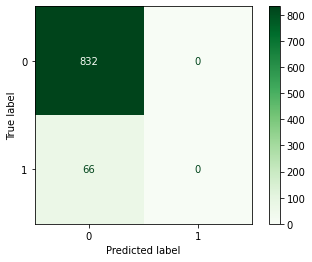

In [1239]:
plot_confusion_matrix(clf, X_val, y_val,cmap='Greens')  

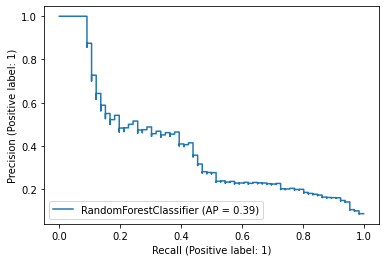

In [1240]:
PrecisionRecallDisplay.from_estimator(clf, X_val, y_val)

Aqui se listan las variables mas influyentes en la prediccion.

In [1241]:
feature_imp = pd.Series(clf.feature_importances_,index=vector_names).sort_values(ascending=False)
feature_imp.head(20)

RAG_INTER_2019       0.125850
RAG_INTER_2018       0.095302
RAGE51_INTER_2019    0.044715
PTT237_2017          0.038456
RAGE51_2017          0.033053
ACC113_INTER_2019    0.031099
PTT136_INTER_2018    0.030549
ACC211_INTER_2019    0.028380
PSC225_INTER_2019    0.025220
AC_INTER_2019        0.024680
ACC113_INTER_2018    0.023005
RAGE55_INTER_2019    0.021722
ACC11H_INTER_2019    0.021497
PTT136_INTER_2019    0.020629
antiguedad           0.020084
PTT136_2017          0.017619
PSC224_2017          0.014669
PSC224_INTER_2019    0.014167
RAIX_INTER_2019      0.012917
RAGE51_INTER_2018    0.012791
dtype: float64

### 8.2 Optimización de parámetros RF

Ahora mediante un proceso de busqueda aleatoria se pretende encontrar los mejores hiperparametros para el algoritmo de random forest. Se valida el modelo mediante cross validation de 6 folds y se usa la metrica de precision para saber cual es el mejor.

In [1242]:
MOD = RandomForestClassifier(random_state=100,class_weight="balanced") 
m_params = { 
            "RF": {
                    "n_estimators" : np.linspace(5, 100, 30, dtype = "int"), 
                    "max_depth":np.linspace(1, 15, 10, dtype = "int"), 
                    "min_samples_leaf": np.linspace(2, 300, 20, dtype = "int"), 
                    "min_samples_split": np.linspace(2, 300, 5, dtype = "int"),  
                    "max_features": ["sqrt", "log2",10, None],
                    },
            }
scoreFunction = {"precision": "precision"}
random_search = RandomizedSearchCV(MOD,
                                       param_distributions = m_params["RF"], 
                                       n_iter = 50,
                                       scoring = scoreFunction,               
                                       refit = "precision",
                                       return_train_score = True,
                                       random_state = 42,
                                       cv = 6,
                                        verbose = 2 ) 

random_search.fit(X_train, y_train)
MOD = random_search.best_estimator_

Fitting 6 folds for each of 50 candidates, totalling 300 fits
[CV] END max_depth=2, max_features=log2, min_samples_leaf=80, min_samples_split=76, n_estimators=54; total time=   0.2s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=80, min_samples_split=76, n_estimators=54; total time=   0.2s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=80, min_samples_split=76, n_estimators=54; total time=   0.2s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=80, min_samples_split=76, n_estimators=54; total time=   0.1s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=80, min_samples_split=76, n_estimators=54; total time=   0.1s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=80, min_samples_split=76, n_estimators=54; total time=   0.1s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=80, min_samples_split=225, n_estimators=70; total time=   0.3s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=80, min_samples_split=225, n_estimators

[CV] END max_depth=15, max_features=log2, min_samples_leaf=174, min_samples_split=151, n_estimators=60; total time=   0.2s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=174, min_samples_split=151, n_estimators=60; total time=   0.2s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=174, min_samples_split=151, n_estimators=60; total time=   0.2s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=174, min_samples_split=151, n_estimators=60; total time=   0.2s
[CV] END max_depth=5, max_features=10, min_samples_leaf=221, min_samples_split=76, n_estimators=8; total time=   0.0s
[CV] END max_depth=5, max_features=10, min_samples_leaf=221, min_samples_split=76, n_estimators=8; total time=   0.0s
[CV] END max_depth=5, max_features=10, min_samples_leaf=221, min_samples_split=76, n_estimators=8; total time=   0.0s
[CV] END max_depth=5, max_features=10, min_samples_leaf=221, min_samples_split=76, n_estimators=8; total time=   0.0s
[CV] END max_depth=5, max_features=1

[CV] END max_depth=8, max_features=10, min_samples_leaf=205, min_samples_split=2, n_estimators=67; total time=   0.3s
[CV] END max_depth=1, max_features=log2, min_samples_leaf=237, min_samples_split=151, n_estimators=8; total time=   0.0s
[CV] END max_depth=1, max_features=log2, min_samples_leaf=237, min_samples_split=151, n_estimators=8; total time=   0.0s
[CV] END max_depth=1, max_features=log2, min_samples_leaf=237, min_samples_split=151, n_estimators=8; total time=   0.0s
[CV] END max_depth=1, max_features=log2, min_samples_leaf=237, min_samples_split=151, n_estimators=8; total time=   0.0s
[CV] END max_depth=1, max_features=log2, min_samples_leaf=237, min_samples_split=151, n_estimators=8; total time=   0.0s
[CV] END max_depth=1, max_features=log2, min_samples_leaf=237, min_samples_split=151, n_estimators=8; total time=   0.0s
[CV] END max_depth=13, max_features=10, min_samples_leaf=143, min_samples_split=2, n_estimators=21; total time=   0.1s
[CV] END max_depth=13, max_features=1

[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=49, min_samples_split=2, n_estimators=96; total time=   1.5s
[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=49, min_samples_split=2, n_estimators=96; total time=   1.8s
[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=49, min_samples_split=2, n_estimators=96; total time=   1.6s
[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=49, min_samples_split=2, n_estimators=96; total time=   1.6s
[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=49, min_samples_split=2, n_estimators=96; total time=   1.6s
[CV] END max_depth=2, max_features=10, min_samples_leaf=33, min_samples_split=300, n_estimators=41; total time=   0.1s
[CV] END max_depth=2, max_features=10, min_samples_leaf=33, min_samples_split=300, n_estimators=41; total time=   0.1s
[CV] END max_depth=2, max_features=10, min_samples_leaf=33, min_samples_split=300, n_estimators=41; total time=   0.1s
[CV] END max_depth=2, max_features=10, min_

[CV] END max_depth=4, max_features=10, min_samples_leaf=158, min_samples_split=76, n_estimators=73; total time=   0.3s
[CV] END max_depth=4, max_features=10, min_samples_leaf=158, min_samples_split=76, n_estimators=73; total time=   0.3s
[CV] END max_depth=15, max_features=10, min_samples_leaf=221, min_samples_split=225, n_estimators=90; total time=   0.4s
[CV] END max_depth=15, max_features=10, min_samples_leaf=221, min_samples_split=225, n_estimators=90; total time=   0.4s
[CV] END max_depth=15, max_features=10, min_samples_leaf=221, min_samples_split=225, n_estimators=90; total time=   0.4s
[CV] END max_depth=15, max_features=10, min_samples_leaf=221, min_samples_split=225, n_estimators=90; total time=   0.4s
[CV] END max_depth=15, max_features=10, min_samples_leaf=221, min_samples_split=225, n_estimators=90; total time=   0.5s
[CV] END max_depth=15, max_features=10, min_samples_leaf=221, min_samples_split=225, n_estimators=90; total time=   0.4s
[CV] END max_depth=1, max_features=N

In [1243]:
random_search.best_params_

{'n_estimators': 57,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': None,
 'max_depth': 11}

In [1244]:
y_pred=MOD.predict(X_val)

In [1245]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       832
           1       0.84      0.64      0.72        66

    accuracy                           0.96       898
   macro avg       0.91      0.81      0.85       898
weighted avg       0.96      0.96      0.96       898



C:\Users\gabol\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


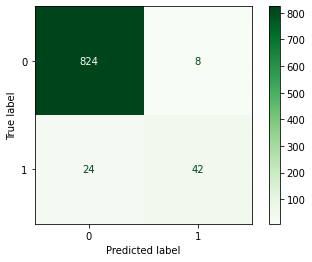

In [1246]:
plot_confusion_matrix(MOD, X_val, y_val,cmap='Greens') 

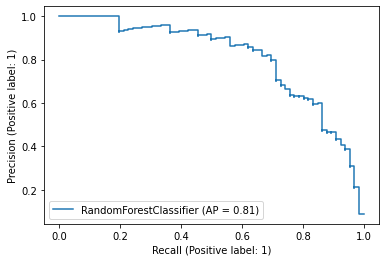

In [1247]:
PrecisionRecallDisplay.from_estimator(MOD, X_val, y_val)

In [1249]:
feature_imp = pd.Series(MOD.feature_importances_,index=vector_names).sort_values(ascending=False)
feature_imp.head(20)

RAG_INTER_2019       0.267097
RAG_2017             0.216319
RAG_INTER_2018       0.170787
PTT136_INTER_2019    0.075592
PTT136_2017          0.032209
PTT136_INTER_2018    0.024255
RAX_INTER_2019       0.007650
AC_2017              0.007511
antiguedad           0.007394
PSC224_INTER_2018    0.006815
RAGE51_INTER_2019    0.006294
PTT237_2017          0.006275
ACC114_2017          0.006044
RAIX_INTER_2019      0.005447
ACC118_2017          0.004829
PSC224_2017          0.004666
RAXFI_INTER_2018     0.004561
RAGE51_2017          0.004561
RAGE51_INTER_2018    0.004419
ACC211_2017          0.004332
dtype: float64

### 8.2 Optimización de parámetros XGboost

In [1255]:
xgb_sm = xgb.XGBClassifier(random_state = 42,)
xgb_params = {'eta' : [0.1,0.01,0.001],  
              'scale_pos_weight' : np.linspace(1, 20, 20, dtype = "int"), 
              'eval_metric': ['aucpr'],
              'max_depth' : [3,4,6,7,9],
              'lambda' : [1,1.5,2,3],      
              'alpha' : [0,0.5,1,2,],        
              'random_state': [42]}
scoreFunction = {"precision": "precision"}
     
rand_xgb = RandomizedSearchCV(xgb_sm,
                             
                                 param_distributions = xgb_params,
                                 n_iter = 30,
                                 cv = 6,
                                 refit = "precision",
                                 random_state = 42,
                                 return_train_score = True,
                                 scoring = scoreFunction,
                                 verbose=3)


rand_xgb.fit(X_train, y_train)
xgb_sm = rand_xgb.best_estimator_

Fitting 6 folds for each of 30 candidates, totalling 180 fits
[CV 1/6] END alpha=0, eta=0.001, eval_metric=aucpr, lambda=1, max_depth=7, scale_pos_weight=1; precision: (train=0.909, test=0.662) total time=   3.6s
[CV 2/6] END alpha=0, eta=0.001, eval_metric=aucpr, lambda=1, max_depth=7, scale_pos_weight=1; precision: (train=0.895, test=0.671) total time=   4.2s
[CV 3/6] END alpha=0, eta=0.001, eval_metric=aucpr, lambda=1, max_depth=7, scale_pos_weight=1; precision: (train=0.903, test=0.712) total time=   4.4s
[CV 4/6] END alpha=0, eta=0.001, eval_metric=aucpr, lambda=1, max_depth=7, scale_pos_weight=1; precision: (train=0.939, test=0.724) total time=   5.0s
[CV 5/6] END alpha=0, eta=0.001, eval_metric=aucpr, lambda=1, max_depth=7, scale_pos_weight=1; precision: (train=0.919, test=0.781) total time=   4.6s
[CV 6/6] END alpha=0, eta=0.001, eval_metric=aucpr, lambda=1, max_depth=7, scale_pos_weight=1; precision: (train=0.899, test=0.767) total time=   5.2s
[CV 1/6] END alpha=2, eta=0.1, e

[CV 1/6] END alpha=0.5, eta=0.01, eval_metric=aucpr, lambda=1, max_depth=9, scale_pos_weight=6; precision: (train=0.908, test=0.625) total time=   4.7s
[CV 2/6] END alpha=0.5, eta=0.01, eval_metric=aucpr, lambda=1, max_depth=9, scale_pos_weight=6; precision: (train=0.883, test=0.653) total time=   4.9s
[CV 3/6] END alpha=0.5, eta=0.01, eval_metric=aucpr, lambda=1, max_depth=9, scale_pos_weight=6; precision: (train=0.896, test=0.642) total time=   5.8s
[CV 4/6] END alpha=0.5, eta=0.01, eval_metric=aucpr, lambda=1, max_depth=9, scale_pos_weight=6; precision: (train=0.858, test=0.620) total time=   9.3s
[CV 5/6] END alpha=0.5, eta=0.01, eval_metric=aucpr, lambda=1, max_depth=9, scale_pos_weight=6; precision: (train=0.927, test=0.605) total time=   8.4s
[CV 6/6] END alpha=0.5, eta=0.01, eval_metric=aucpr, lambda=1, max_depth=9, scale_pos_weight=6; precision: (train=0.863, test=0.664) total time=   8.8s
[CV 1/6] END alpha=0, eta=0.01, eval_metric=aucpr, lambda=3, max_depth=7, scale_pos_weig

[CV 1/6] END alpha=0, eta=0.01, eval_metric=aucpr, lambda=1, max_depth=7, scale_pos_weight=15; precision: (train=0.576, test=0.411) total time=  10.8s
[CV 2/6] END alpha=0, eta=0.01, eval_metric=aucpr, lambda=1, max_depth=7, scale_pos_weight=15; precision: (train=0.573, test=0.485) total time=   7.8s
[CV 3/6] END alpha=0, eta=0.01, eval_metric=aucpr, lambda=1, max_depth=7, scale_pos_weight=15; precision: (train=0.594, test=0.437) total time=   9.6s
[CV 4/6] END alpha=0, eta=0.01, eval_metric=aucpr, lambda=1, max_depth=7, scale_pos_weight=15; precision: (train=0.546, test=0.452) total time=   7.2s
[CV 5/6] END alpha=0, eta=0.01, eval_metric=aucpr, lambda=1, max_depth=7, scale_pos_weight=15; precision: (train=0.531, test=0.397) total time=   6.9s
[CV 6/6] END alpha=0, eta=0.01, eval_metric=aucpr, lambda=1, max_depth=7, scale_pos_weight=15; precision: (train=0.562, test=0.460) total time=   6.7s
[CV 1/6] END alpha=0, eta=0.001, eval_metric=aucpr, lambda=2, max_depth=9, scale_pos_weight=3;

[CV 2/6] END alpha=1, eta=0.01, eval_metric=aucpr, lambda=2, max_depth=3, scale_pos_weight=6; precision: (train=0.505, test=0.488) total time=   5.3s
[CV 3/6] END alpha=1, eta=0.01, eval_metric=aucpr, lambda=2, max_depth=3, scale_pos_weight=6; precision: (train=0.488, test=0.397) total time=   7.2s
[CV 4/6] END alpha=1, eta=0.01, eval_metric=aucpr, lambda=2, max_depth=3, scale_pos_weight=6; precision: (train=0.554, test=0.554) total time=   5.1s
[CV 5/6] END alpha=1, eta=0.01, eval_metric=aucpr, lambda=2, max_depth=3, scale_pos_weight=6; precision: (train=0.463, test=0.463) total time=   3.6s
[CV 6/6] END alpha=1, eta=0.01, eval_metric=aucpr, lambda=2, max_depth=3, scale_pos_weight=6; precision: (train=0.518, test=0.496) total time=   6.2s
[CV 1/6] END alpha=2, eta=0.001, eval_metric=aucpr, lambda=2, max_depth=6, scale_pos_weight=19; precision: (train=0.347, test=0.281) total time=   7.2s
[CV 2/6] END alpha=2, eta=0.001, eval_metric=aucpr, lambda=2, max_depth=6, scale_pos_weight=19; pr

In [1256]:
rand_xgb.best_params_

{'scale_pos_weight': 10,
 'max_depth': 9,
 'lambda': 1.5,
 'eval_metric': 'aucpr',
 'eta': 0.1,
 'alpha': 0}

In [1257]:
y_pred=xgb_sm.predict(X_val)

In [1258]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       832
           1       0.79      0.64      0.71        66

    accuracy                           0.96       898
   macro avg       0.88      0.81      0.84       898
weighted avg       0.96      0.96      0.96       898



C:\Users\gabol\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


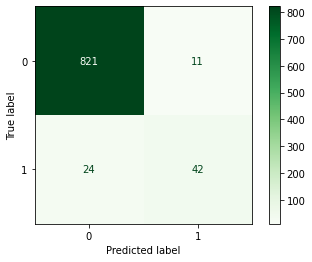

In [1259]:
plot_confusion_matrix(xgb_sm, X_val, y_val,cmap='Greens') 

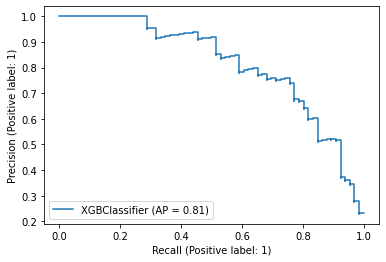

In [1260]:
PrecisionRecallDisplay.from_estimator(xgb_sm, X_val, y_val)

In [1262]:
feature_imp = pd.Series(xgb_sm.feature_importances_,index=vector_names).sort_values(ascending=False)
feature_imp.head(20)

RAG_INTER_2019                                                                                                                                                               0.054990
RAG_2017                                                                                                                                                                     0.042823
CIIU_C2100 - Fabricación de productos farmacéuticos, sustancias químicas medicinales y productos botánicos de uso farmacéutico                                               0.042018
RAG_INTER_2018                                                                                                                                                               0.036783
CIIU_M6910 - Actividades jurídicas                                                                                                                                           0.031032
PAISMATRIZ_211 - CHILE                                                                    

### 8.3 Optimización de parámetros SVM

De la misma manera para el algoritmo SVM

In [1269]:
mdl = svc(probability = True, random_state = 1,class_weight ="balanced")
rand_list = {'C': [1,100, 1000], 
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf',"poly"]}
scoreFunction = { "precision": "precision"}    
rand_search = RandomizedSearchCV(mdl, 
                                 param_distributions = rand_list,
                                 n_iter = 25,
                                 cv = 5,
                                 refit = "precision",
                                 random_state = 42,
                                 return_train_score = True,
                                 scoring = scoreFunction,
                                 verbose=3) 
rand_search.fit(X_train, y_train) 
mdl = random_search.best_estimator_

C:\Users\gabol\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 18 is smaller than n_iter=25. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END C=1, gamma=1, kernel=rbf; precision: (train=0.479, test=0.126) total time= 1.4min
[CV 2/5] END C=1, gamma=1, kernel=rbf; precision: (train=0.478, test=0.144) total time= 1.5min
[CV 3/5] END C=1, gamma=1, kernel=rbf; precision: (train=0.502, test=0.159) total time= 1.6min
[CV 4/5] END C=1, gamma=1, kernel=rbf; precision: (train=0.508, test=0.185) total time= 1.7min
[CV 5/5] END C=1, gamma=1, kernel=rbf; precision: (train=0.495, test=0.145) total time= 1.3min
[CV 1/5] END C=1, gamma=1, kernel=poly; precision: (train=0.925, test=0.379) total time=  26.1s
[CV 2/5] END C=1, gamma=1, kernel=poly; precision: (train=0.940, test=0.362) total time=  23.0s
[CV 3/5] END C=1, gamma=1, kernel=poly; precision: (train=0.940, test=0.323) total time=  24.1s
[CV 4/5] END C=1, gamma=1, kernel=poly; precision: (train=0.950, test=0.383) total time=  24.4s
[CV 5/5] END C=1, gamma=1, kernel=poly; precision: (train=0.963, test=0.384) tot

[CV 4/5] END C=1000, gamma=0.01, kernel=rbf; precision: (train=0.518, test=0.336) total time=  36.9s
[CV 5/5] END C=1000, gamma=0.01, kernel=rbf; precision: (train=0.520, test=0.346) total time=  34.6s
[CV 1/5] END C=1000, gamma=0.01, kernel=poly; precision: (train=0.394, test=0.261) total time=  40.8s
[CV 2/5] END C=1000, gamma=0.01, kernel=poly; precision: (train=0.420, test=0.277) total time=  57.1s
[CV 3/5] END C=1000, gamma=0.01, kernel=poly; precision: (train=0.414, test=0.278) total time=  43.7s
[CV 4/5] END C=1000, gamma=0.01, kernel=poly; precision: (train=0.418, test=0.285) total time=  41.9s
[CV 5/5] END C=1000, gamma=0.01, kernel=poly; precision: (train=0.391, test=0.257) total time=  45.2s


In [1270]:
print(best_hyperparams)

{'colsample_bytree': 0.5137415282581277, 'gamma': 4.237659863635667, 'max_depth': 12.0, 'min_child_weight': 1.0}


In [1271]:
svc_mdl = rand_search.best_estimator_
y_pred=svc_mdl.predict(X_val)

In [1272]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       832
           1       0.36      0.44      0.39        66

    accuracy                           0.90       898
   macro avg       0.66      0.69      0.67       898
weighted avg       0.91      0.90      0.91       898



C:\Users\gabol\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


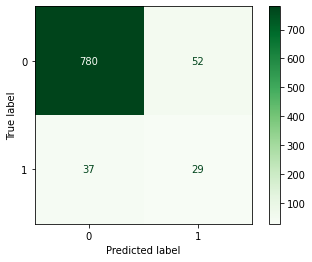

In [1273]:
plot_confusion_matrix(svc_mdl, X_val, y_val,cmap='Greens') 

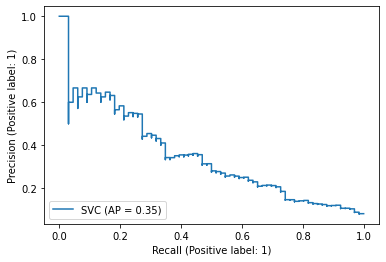

In [1274]:
PrecisionRecallDisplay.from_estimator(svc_mdl, X_val, y_val)

### 8.4 Optimización de parámetros LogisticRegression

Finalmente se aplica para el algoritmo de Regresion Logistica

In [1264]:
log_reg_sm = LogisticRegression()
log_reg_params = {"penalty": ['l2'],
                  'C': [ 0.001, 0.01,0.1,1, 10, 100, 1000],
                  'solver':[ 'sag', 'saga'],
                 'multi_class':['auto', 'ovr']}

scoreFunction = {"recall": "recall", "balanced_accuracy": "balanced_accuracy"}    
log_reg_search = RandomizedSearchCV(log_reg_sm, 
                                 param_distributions = log_reg_params,
                                 n_iter = 20,
                                 cv = 3,
                                 refit = "balanced_accuracy",
                                 random_state = 42,
                                 return_train_score = True,
                                 scoring = scoreFunction,
                                 verbose=3) 
log_reg_search.fit(X_train, y_train) 
log_reg_sm = log_reg_search.best_estimator_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END C=0.1, multi_class=auto, penalty=l2, solver=saga; balanced_accuracy: (train=0.500, test=0.500) recall: (train=0.000, test=0.000) total time=   3.0s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END C=0.1, multi_class=auto, penalty=l2, solver=saga; balanced_accuracy: (train=0.501, test=0.500) recall: (train=0.003, test=0.000) total time=   2.9s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END C=0.1, multi_class=auto, penalty=l2, solver=saga; balanced_accuracy: (train=0.500, test=0.500) recall: (train=0.000, test=0.000) total time=   2.9s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END C=1000, multi_class=auto, penalty=l2, solver=saga; balanced_accuracy: (train=0.684, test=0.603) recall: (train=0.374, test=0.218) total time=   3.8s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END C=1000, multi_class=auto, penalty=l2, solver=saga; balanced_accuracy: (train=0.682, test=0.592) recall: (train=0.371, test=0.199) total time=   3.0s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END C=1000, multi_class=auto, penalty=l2, solver=saga; balanced_accuracy: (train=0.671, test=0.603) recall: (train=0.349, test=0.218) total time=   3.3s
[CV 1/3] END C=0.1, multi_class=auto, penalty=l2, solver=sag; balanced_accuracy: (train=0.500, test=0.500) recall: (train=0.000, test=0.000) total time=   2.5s
[CV 2/3] END C=0.1, multi_class=auto, penalty=l2, solver=sag; balanced_accuracy: (train=0.501, test=0.500) recall: (train=0.003, test=0.000) total time=   1.5s
[CV 3/3] END C=0.1, multi_class=auto, penalty=l2, solver=sag; balanced_accuracy: (train=0.500, test=0.500) recall: (train=0.000, test=0.000) total time=   1.7s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END C=100, multi_class=auto, penalty=l2, solver=saga; balanced_accuracy: (train=0.680, test=0.601) recall: (train=0.366, test=0.213) total time=   3.7s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END C=100, multi_class=auto, penalty=l2, solver=saga; balanced_accuracy: (train=0.678, test=0.592) recall: (train=0.363, test=0.199) total time=   2.9s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END C=100, multi_class=auto, penalty=l2, solver=saga; balanced_accuracy: (train=0.666, test=0.603) recall: (train=0.338, test=0.218) total time=   2.7s
[CV 1/3] END C=0.001, multi_class=auto, penalty=l2, solver=sag; balanced_accuracy: (train=0.500, test=0.500) recall: (train=0.000, test=0.000) total time=   0.2s
[CV 2/3] END C=0.001, multi_class=auto, penalty=l2, solver=sag; balanced_accuracy: (train=0.500, test=0.500) recall: (train=0.000, test=0.000) total time=   0.2s
[CV 3/3] END C=0.001, multi_class=auto, penalty=l2, solver=sag; balanced_accuracy: (train=0.500, test=0.500) recall: (train=0.000, test=0.000) total time=   0.2s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END C=1, multi_class=auto, penalty=l2, solver=sag; balanced_accuracy: (train=0.541, test=0.547) recall: (train=0.084, test=0.096) total time=   2.3s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END C=1, multi_class=auto, penalty=l2, solver=sag; balanced_accuracy: (train=0.552, test=0.524) recall: (train=0.107, test=0.051) total time=   2.3s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END C=1, multi_class=auto, penalty=l2, solver=sag; balanced_accuracy: (train=0.550, test=0.533) recall: (train=0.102, test=0.071) total time=   2.3s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END C=10, multi_class=auto, penalty=l2, solver=saga; balanced_accuracy: (train=0.646, test=0.590) recall: (train=0.298, test=0.188) total time=   2.9s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END C=10, multi_class=auto, penalty=l2, solver=saga; balanced_accuracy: (train=0.650, test=0.573) recall: (train=0.305, test=0.158) total time=   2.8s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END C=10, multi_class=auto, penalty=l2, solver=saga; balanced_accuracy: (train=0.646, test=0.590) recall: (train=0.298, test=0.188) total time=   2.7s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END C=100, multi_class=ovr, penalty=l2, solver=sag; balanced_accuracy: (train=0.706, test=0.620) recall: (train=0.420, test=0.254) total time=   2.4s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END C=100, multi_class=ovr, penalty=l2, solver=sag; balanced_accuracy: (train=0.710, test=0.610) recall: (train=0.426, test=0.235) total time=   2.3s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END C=100, multi_class=ovr, penalty=l2, solver=sag; balanced_accuracy: (train=0.693, test=0.618) recall: (train=0.394, test=0.254) total time=   2.3s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END C=0.1, multi_class=ovr, penalty=l2, solver=saga; balanced_accuracy: (train=0.500, test=0.500) recall: (train=0.000, test=0.000) total time=   3.0s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END C=0.1, multi_class=ovr, penalty=l2, solver=saga; balanced_accuracy: (train=0.501, test=0.500) recall: (train=0.003, test=0.000) total time=   2.8s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END C=0.1, multi_class=ovr, penalty=l2, solver=saga; balanced_accuracy: (train=0.500, test=0.500) recall: (train=0.000, test=0.000) total time=   2.7s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END C=1, multi_class=auto, penalty=l2, solver=saga; balanced_accuracy: (train=0.540, test=0.535) recall: (train=0.081, test=0.071) total time=   2.8s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END C=1, multi_class=auto, penalty=l2, solver=saga; balanced_accuracy: (train=0.552, test=0.524) recall: (train=0.107, test=0.051) total time=   2.7s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END C=1, multi_class=auto, penalty=l2, solver=saga; balanced_accuracy: (train=0.549, test=0.531) recall: (train=0.099, test=0.066) total time=   2.9s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END C=1, multi_class=ovr, penalty=l2, solver=saga; balanced_accuracy: (train=0.540, test=0.535) recall: (train=0.081, test=0.071) total time=   2.7s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END C=1, multi_class=ovr, penalty=l2, solver=saga; balanced_accuracy: (train=0.552, test=0.524) recall: (train=0.107, test=0.051) total time=   2.9s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END C=1, multi_class=ovr, penalty=l2, solver=saga; balanced_accuracy: (train=0.549, test=0.531) recall: (train=0.099, test=0.066) total time=   2.8s
[CV 1/3] END C=0.001, multi_class=auto, penalty=l2, solver=saga; balanced_accuracy: (train=0.500, test=0.500) recall: (train=0.000, test=0.000) total time=   0.4s
[CV 2/3] END C=0.001, multi_class=auto, penalty=l2, solver=saga; balanced_accuracy: (train=0.500, test=0.500) recall: (train=0.000, test=0.000) total time=   0.4s
[CV 3/3] END C=0.001, multi_class=auto, penalty=l2, solver=saga; balanced_accuracy: (train=0.500, test=0.500) recall: (train=0.000, test=0.000) total time=   0.4s
[CV 1/3] END C=0.01, multi_class=auto, penalty=l2, solver=sag; balanced_accuracy: (train=0.500, test=0.500) recall: (train=0.000, test=0.000) total time=   0.3s
[CV 2/3] END C=0.01, multi_class=auto, penalty=l2, solver=sag; balanced_accuracy: (train=0.500, test=0.500) recall: (train=0.000, test=0.000) total time=   0.3s
[CV 3/3] END C=0.01, multi_clas

C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END C=10, multi_class=auto, penalty=l2, solver=sag; balanced_accuracy: (train=0.660, test=0.594) recall: (train=0.326, test=0.198) total time=   2.5s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END C=10, multi_class=auto, penalty=l2, solver=sag; balanced_accuracy: (train=0.657, test=0.585) recall: (train=0.320, test=0.184) total time=   2.3s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END C=10, multi_class=auto, penalty=l2, solver=sag; balanced_accuracy: (train=0.655, test=0.594) recall: (train=0.316, test=0.198) total time=   2.4s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END C=100, multi_class=ovr, penalty=l2, solver=saga; balanced_accuracy: (train=0.681, test=0.601) recall: (train=0.369, test=0.213) total time=   2.8s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END C=100, multi_class=ovr, penalty=l2, solver=saga; balanced_accuracy: (train=0.679, test=0.592) recall: (train=0.363, test=0.199) total time=   2.8s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END C=100, multi_class=ovr, penalty=l2, solver=saga; balanced_accuracy: (train=0.667, test=0.603) recall: (train=0.341, test=0.218) total time=   3.1s
[CV 1/3] END C=0.001, multi_class=ovr, penalty=l2, solver=saga; balanced_accuracy: (train=0.500, test=0.500) recall: (train=0.000, test=0.000) total time=   0.4s
[CV 2/3] END C=0.001, multi_class=ovr, penalty=l2, solver=saga; balanced_accuracy: (train=0.500, test=0.500) recall: (train=0.000, test=0.000) total time=   0.4s
[CV 3/3] END C=0.001, multi_class=ovr, penalty=l2, solver=saga; balanced_accuracy: (train=0.500, test=0.500) recall: (train=0.000, test=0.000) total time=   0.4s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END C=1000, multi_class=ovr, penalty=l2, solver=sag; balanced_accuracy: (train=0.706, test=0.623) recall: (train=0.420, test=0.259) total time=   4.8s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END C=1000, multi_class=ovr, penalty=l2, solver=sag; balanced_accuracy: (train=0.711, test=0.612) recall: (train=0.429, test=0.240) total time=   2.2s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END C=1000, multi_class=ovr, penalty=l2, solver=sag; balanced_accuracy: (train=0.697, test=0.624) recall: (train=0.402, test=0.264) total time=   2.2s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3] END C=1000, multi_class=auto, penalty=l2, solver=sag; balanced_accuracy: (train=0.706, test=0.623) recall: (train=0.420, test=0.259) total time=   3.5s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3] END C=1000, multi_class=auto, penalty=l2, solver=sag; balanced_accuracy: (train=0.711, test=0.612) recall: (train=0.429, test=0.240) total time=   2.7s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3] END C=1000, multi_class=auto, penalty=l2, solver=sag; balanced_accuracy: (train=0.697, test=0.624) recall: (train=0.402, test=0.264) total time=   2.3s


C:\Users\gabol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [1265]:
y_pred=log_reg_sm.predict(X_val)

In [1266]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       832
           1       0.64      0.35      0.45        66

    accuracy                           0.94       898
   macro avg       0.79      0.67      0.71       898
weighted avg       0.93      0.94      0.93       898



C:\Users\gabol\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


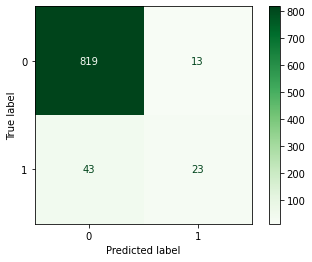

In [1267]:
plot_confusion_matrix(log_reg_sm, X_val, y_val,cmap='Greens') 

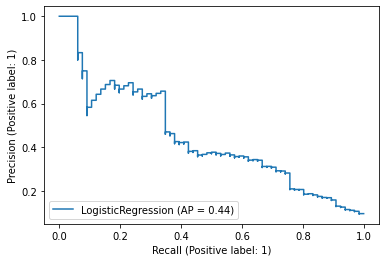

In [1268]:
PrecisionRecallDisplay.from_estimator(log_reg_sm, X_val, y_val)

### 8.5 Comparación de modelos

C:\Users\gabol\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\gabol\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\gabol\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
 

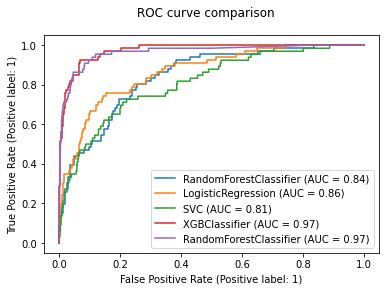

In [1275]:
fig = plot_roc_curve( clf, X_val, y_val)
fig = plot_roc_curve( log_reg_sm, X_val, y_val, ax = fig.ax_)
fig = plot_roc_curve( svc_mdl, X_val, y_val, ax = fig.ax_)
fig = plot_roc_curve( xgb_sm, X_val, y_val, ax = fig.ax_)
fig = plot_roc_curve( MOD, X_val, y_val, ax = fig.ax_)

fig.figure_.suptitle("ROC curve comparison")
plt.show() 

C:\Users\gabol\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\gabol\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\gabol\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed i

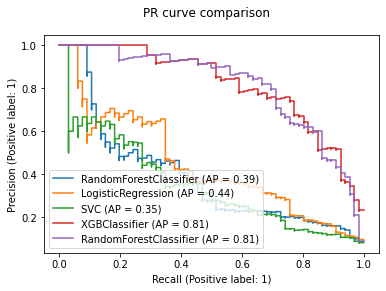

In [1276]:
fig = plot_precision_recall_curve( clf, X_val, y_val)
fig = plot_precision_recall_curve( log_reg_sm, X_val, y_val, ax = fig.ax_)
fig = plot_precision_recall_curve( svc_mdl, X_val, y_val, ax = fig.ax_)
fig = plot_precision_recall_curve( xgb_sm, X_val, y_val, ax = fig.ax_)
fig = plot_precision_recall_curve( MOD, X_val, y_val, ax = fig.ax_)


fig.figure_.suptitle("PR curve comparison")
plt.show() 

C:\Users\gabol\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\gabol\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\gabol\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods:

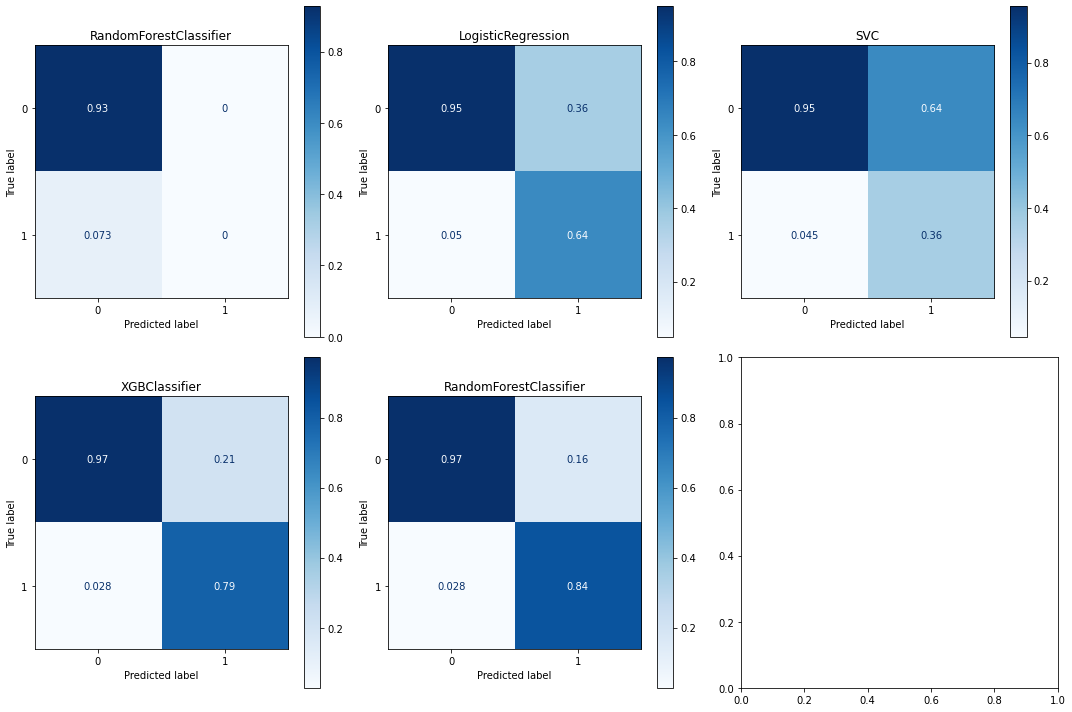

In [1277]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
classifiers=[clf,log_reg_sm,svc_mdl,xgb_sm,MOD]
for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, 
                          X_val, 
                          y_val, 
                          ax=ax, 
                          cmap='Blues',
                         #display_labels=data.target_names
                          normalize='pred'
                         )
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
plt.show()